# Trabalho Final - Machine Learning

* integrante 1
* integrante 2
* integrante 3
* integrante 4

Neste trabalho, como parte do time de analistas da Quantum Finance, vocês deverão explorar uma base de dados originalmente utilizada para classificação de score de crédito, disponível no Kaggle (https://www.kaggle.com/datasets/parisrohan/credit-score-classification), utilizando técnicas de Análise Exploratória de Dados (EDA) e algoritmos de Machine Learning supervisionados. 


O objetivo é aplicar e interpretar os resultados obtidos, assim como criar um sistema que gere valor a partir da análise da base de dados.

**Modelo de Classificação Supervisionada**


Desenvolver um modelo de classificação supervisionada para prever a classificação de crédito dos indivíduos presentes na base.


Passos esperados:

1. Realizar uma análise exploratória dos dados (EDA) para entender as características principais da base e as relações entre variáveis; 2 pontos

2. Implementar um pipeline de modelo de classificação usando Random Forest, XGBoost e LightGBM. Use GridSearch para otimizar os parametros de cada modelo; 4 pontos

3. Avaliar os resultados utilizando a métrica mais adequada e **justifique** sua escolha; 2 pontos

4. Apresentar os resultados, indicando a métrica no conjunto de treino (train.csv) e explicar como o modelo pode ser utilizado para decisões financeiras. 2 pontos


Entregáveis:

1. Este jupyter notebook executado e com os resultados aparentes (não serão aceitos outros formatos)

### 1. Importação de Bibliotecas

Importa as principais bibliotecas para análise de dados, visualização e machine learning:

pandas, numpy: manipulação de dados

seaborn, matplotlib: gráficos

sklearn: modelos, pré-processamento e validação

xgboost, lightgbm: algoritmos de ML avançados

In [1]:
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




### 2. Carregamento dos Dados

Carrega o arquivo de dados principal para um DataFrame.

In [2]:
df_original = pd.read_csv("train.csv")  


In [3]:
df_original.describe().round(2)  # proporção de valores ausentes por coluna

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.00,100000.00,100000.00,100000.00,100000.00,98035.00,100000.00,100000.00
mean,4194.17,17.09,22.47,72.47,21.07,27.75,32.29,1403.12
std,3183.69,117.40,129.06,466.42,14.86,193.18,5.12,8306.04
min,303.65,-1.00,0.00,1.00,-5.00,0.00,20.00,0.00
25%,1625.57,3.00,4.00,8.00,10.00,3.00,28.05,30.31
50%,3093.75,6.00,5.00,13.00,18.00,6.00,32.31,69.25
75%,5957.45,7.00,7.00,20.00,28.00,9.00,36.50,161.22
max,15204.63,1798.00,1499.00,5797.00,67.00,2597.00,50.00,82331.00


In [4]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob


<i><p style='color:#006DB2' ><big><strong>3.</strong></big> Tratamento de Dados </p>
<p style='color:#006DB2' >Converte colunas para tipos numéricos e trata valores inconsistentes:</p>
<p style='color:#006DB2' >
Usa pd.to_numeric(..., errors='coerce') para garantir que os dados estejam no formato correto.
Mapeia variáveis categóricas para valores numéricos (ex: Credit_Score, Credit_Mix, Payment_of_Min_Amount). </p></i>

In [5]:
df_dados_numericos_tratados = df_original.copy()

df_dados_numericos_tratados['Outstanding_Debt'] = pd.to_numeric(df_original['Outstanding_Debt'], errors='coerce').astype(float)
df_dados_numericos_tratados['Changed_Credit_Limit'] = pd.to_numeric(df_original['Changed_Credit_Limit'], errors='coerce').astype(float)
df_dados_numericos_tratados['Num_of_Loan'] = pd.to_numeric(df_original['Num_of_Loan'], errors='coerce').astype(float)
df_dados_numericos_tratados['Annual_Income'] = pd.to_numeric(df_original['Annual_Income'], errors='coerce').astype(float)
df_dados_numericos_tratados['Monthly_Balance'] = pd.to_numeric(df_original['Monthly_Balance'], errors='coerce').astype(float)
df_dados_numericos_tratados['Amount_invested_monthly'] = pd.to_numeric(df_original['Amount_invested_monthly'], errors='coerce').astype(float)
df_dados_numericos_tratados['Monthly_Inhand_Salary'] = pd.to_numeric(df_original['Monthly_Inhand_Salary'], errors='coerce').astype(float)
df_dados_numericos_tratados['Num_of_Delayed_Payment'] = pd.to_numeric(df_original['Num_of_Delayed_Payment'], errors='coerce').astype(float)

score_map = {'Poor': 0, 'Standard': 1, 'Good': 2}
df_dados_numericos_tratados['Credit_Score'] = df_original['Credit_Score'].map(score_map).astype('Int64')

score_map2 = {'Bad': 0, 'Standard': 1, 'Good': 2, '_': None}
df_dados_numericos_tratados['Credit_Mix'] = df_original['Credit_Mix'].map(score_map2).astype('Int64')

score_map3 = {'NM': 0, 'No': 1, 'Yes': 2}
df_dados_numericos_tratados['Payment_of_Min_Amount'] = df_original['Payment_of_Min_Amount'].map(score_map3).astype('Int64')

<i><p style='color:#006DB2' ><big><strong>4.</strong></big> Limpeza de Colunas Específicas </p>
<p style='color:#006DB2' >Remove caracteres indesejados e converte para numérico:</p>
<p style='color:#006DB2' >Age e Credit_History_Age passam por limpeza de strings e conversão para números. </p></i>

In [6]:
df_dados_numericos_tratados['Age'] = (
    df_dados_numericos_tratados['Age']
    .astype(str)
    .str.replace('-', '', regex=False)
    .str.replace(' ', '', regex=False)  
    .str.replace('_', '', regex=False) 
    .str.replace('nan', '', regex=False)  
    .str.strip()
)

df_dados_numericos_tratados['Age'] = pd.to_numeric(df_dados_numericos_tratados['Age'], errors='coerce').astype(int)

df_dados_numericos_tratados['Credit_History_Age'] = (
    df_dados_numericos_tratados['Credit_History_Age']
    .astype(str)
    .str.replace(' Years and ', '.', regex=False)
    .str.replace(' Months', '', regex=False) 
    .str.replace(' ', '', regex=False) 
    .str.replace('nan', '', regex=False) 
    .str.strip()
)

df_dados_numericos_tratados['Credit_History_Age'] = pd.to_numeric(df_dados_numericos_tratados['Credit_History_Age'], errors='coerce').astype(float)


Estatísticas da coluna Age:
count    100000.000000
mean        119.509700
std         684.757313
min          14.000000
25%          25.000000
50%          34.000000
75%          42.000000
max        8698.000000
Name: Age, dtype: float64

Distribuição dos valores de Age:
Age
8698       1
8697       1
8682       1
8678       1
8674       1
        ... 
18      2385
17      1502
16      1455
15      1574
14      1175
Name: count, Length: 1728, dtype: int64


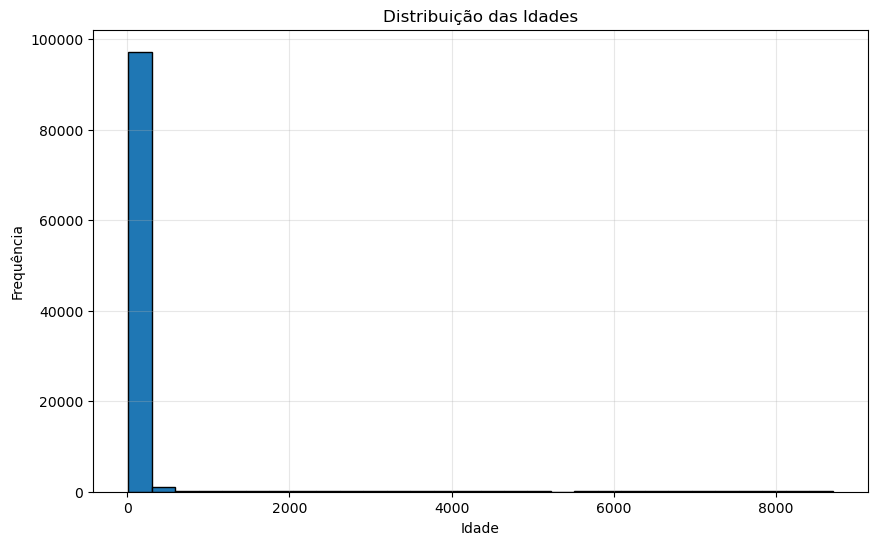


Distribuição por faixa etária:
Faixa_Etaria
0-20     13628
21-30    27964
31-40    28144
41-50    20443
51-60     7040
61-70        0
71-80        0
81-90        0
90+       2781
Name: count, dtype: int64


In [7]:
# Análise da coluna Age
print("\nEstatísticas da coluna Age:")
print(df_dados_numericos_tratados['Age'].describe())

# Verificar valores únicos e suas contagens
print("\nDistribuição dos valores de Age:")
print(df_dados_numericos_tratados['Age'].value_counts().sort_index(ascending=False))

# Plotar histograma da distribuição de idades
plt.figure(figsize=(10,6))
plt.hist(df_dados_numericos_tratados['Age'], bins=30, edgecolor='black')
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)
plt.show()

# Análise por faixa etária
faixas_etarias = [0, 20, 30, 40, 50, 60, 70, 80, 90, float('inf')]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '90+']
df_dados_numericos_tratados['Faixa_Etaria'] = pd.cut(df_dados_numericos_tratados['Age'], bins=faixas_etarias, labels=labels, right=True)

print("\nDistribuição por faixa etária:")
print(df_dados_numericos_tratados['Faixa_Etaria'].value_counts().sort_index())



In [8]:
# Filtrando dados para idade até 60 anos
dados_ate_60 = df_dados_numericos_tratados[df_dados_numericos_tratados['Age'] <= 60]

print("\nEstatísticas para idade até 60 anos:")
print(f"Média de idade: {dados_ate_60['Age'].mean():.2f}")
print(f"Mediana de idade: {dados_ate_60['Age'].median():.2f}")

# Criando novo dataframe com base no df_dados_numericos_tratados
df_age_tratados = df_dados_numericos_tratados.copy()

# Obtendo a mediana calculada anteriormente para idades até 60 anos
mediana_ate_60 = dados_ate_60['Age'].median()

# Substituindo valores de Age maiores que 60 pela mediana
df_age_tratados.loc[df_age_tratados['Age'] > 60, 'Age'] = mediana_ate_60

print("\nEstatísticas da coluna Age após tratamento:")
print(df_age_tratados['Age'].describe())



Estatísticas para idade até 60 anos:
Média de idade: 33.32
Mediana de idade: 33.00

Estatísticas da coluna Age após tratamento:
count    100000.00000
mean         33.31111
std          10.61888
min          14.00000
25%          25.00000
50%          33.00000
75%          41.00000
max          56.00000
Name: Age, dtype: float64


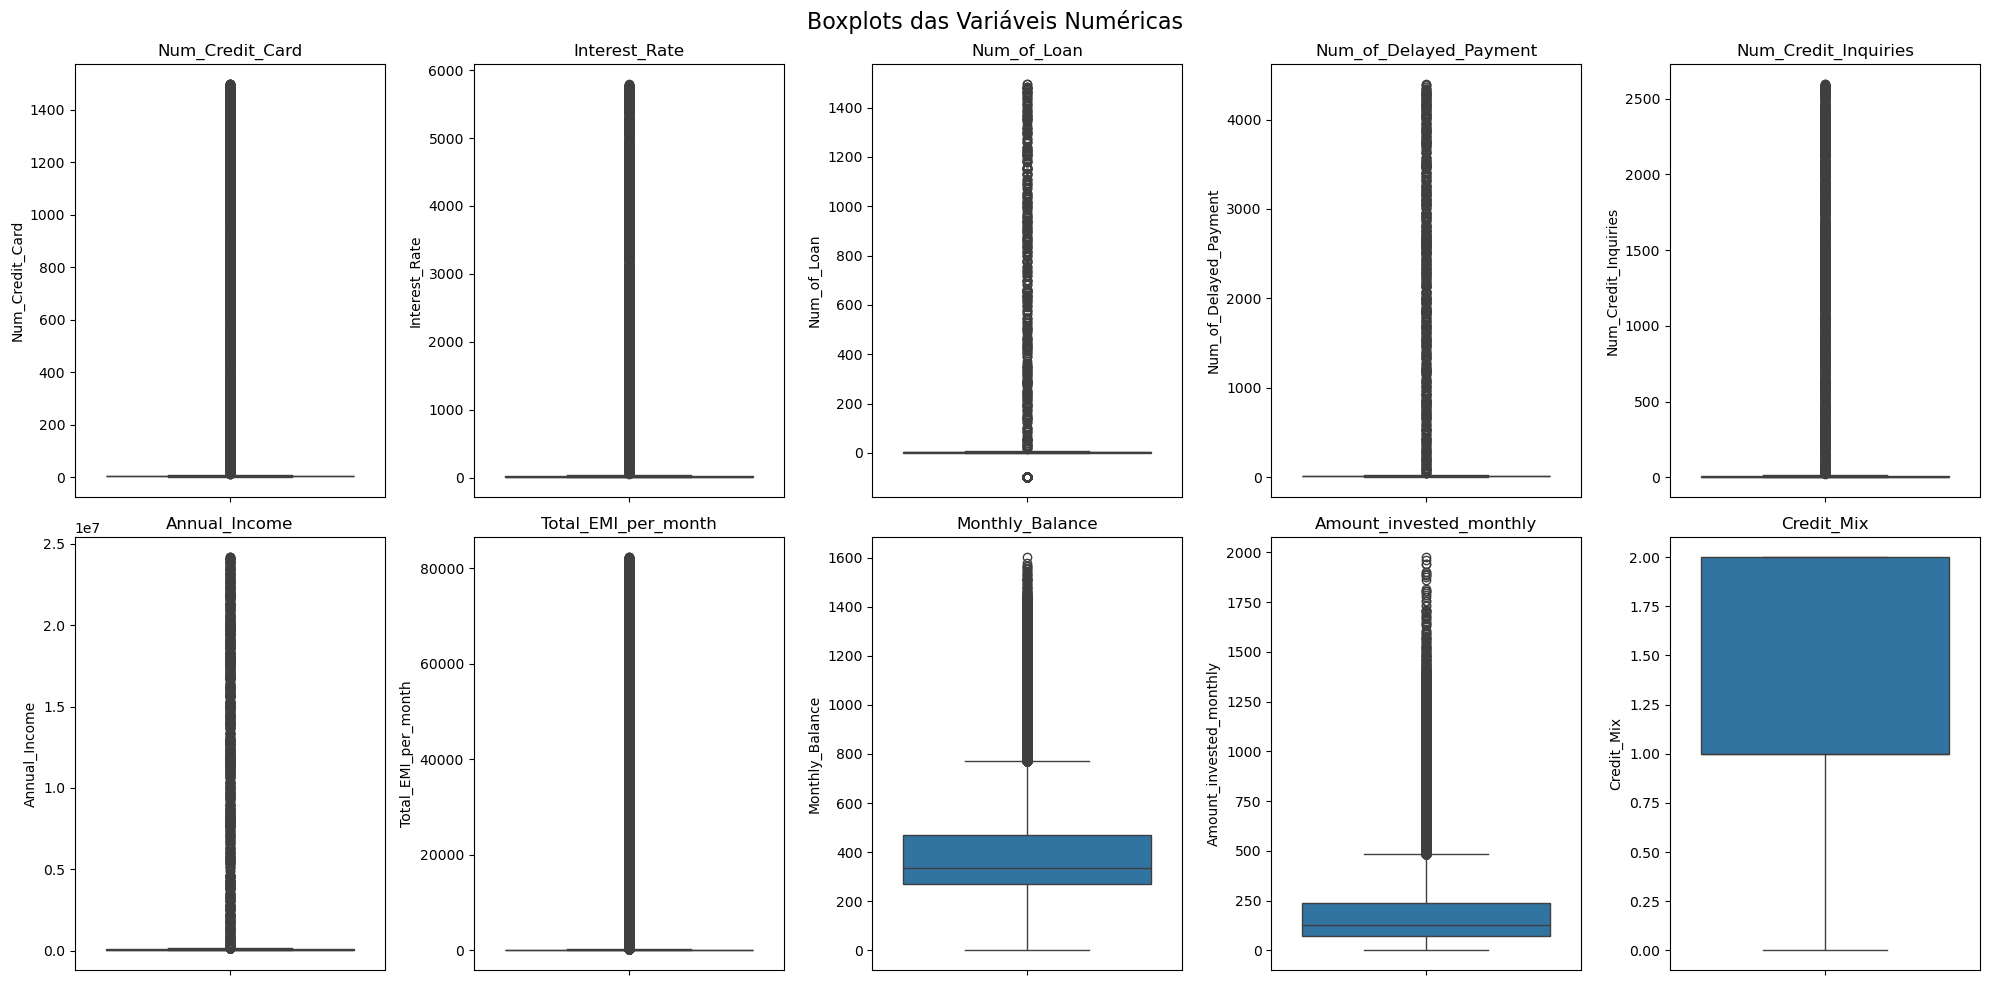

In [9]:
# Criando subplots para os boxplots
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle('Boxplots das Variáveis Numéricas', fontsize=16)

# Lista de colunas para plotar
colunas = ['Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment', 
           'Num_Credit_Inquiries', 'Annual_Income', 'Total_EMI_per_month', 'Monthly_Balance',
           'Amount_invested_monthly', 'Credit_Mix']

# Plotando cada boxplot
for i, coluna in enumerate(colunas):
    row = i // 5
    col = i % 5
    sns.boxplot(data=df_age_tratados, y=coluna, ax=axes[row, col])
    axes[row, col].set_title(coluna)
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [10]:
# Análise da coluna Num_Credit_Card
print("Estatísticas descritivas da coluna Num_Credit_Card:")
print(df_age_tratados['Num_Credit_Card'].describe())

# Calculando os limites para outliers usando o método IQR
Q1 = df_age_tratados['Num_Credit_Card'].quantile(0.25)
Q3 = df_age_tratados['Num_Credit_Card'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("\nLimites para outliers:")
print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")

# Identificando outliers
outliers = df_age_tratados[(df_age_tratados['Num_Credit_Card'] < limite_inferior) | 
                          (df_age_tratados['Num_Credit_Card'] > limite_superior)]

print("\nQuantidade de outliers:", len(outliers))
print(f"Percentual de outliers: {(len(outliers)/len(df_age_tratados))*100:.2f}%")

# Análise por faixa de score de crédito
print("\nMédia de cartões de crédito por score:")
print(df_age_tratados.groupby('Credit_Score')['Num_Credit_Card'].mean())


# Com base na análise anterior, podemos ver que há uma correlação negativa (-0.399)
# entre Num_Credit_Card e Credit_Score, sugerindo que um número muito alto de cartões
# pode impactar negativamente o score de crédito. 


# Criando dataframe temporário apenas com registros dentro dos limites
df_temp = df_age_tratados[(df_age_tratados['Num_Credit_Card'] >= limite_inferior) & 
                         (df_age_tratados['Num_Credit_Card'] <= limite_superior)]

print("\nEstatísticas dos registros dentro dos limites:")
print(f"Média de cartões de crédito: {df_temp['Num_Credit_Card'].mean():.2f}")
print(f"Mediana de cartões de crédito: {df_temp['Num_Credit_Card'].median():.2f}")

# Criando novo dataframe com os valores ajustados
df_num_credit_card_tratados = df_age_tratados.copy()

# Obtendo a mediana dos registros dentro dos limites
mediana_cartoes = df_temp['Num_Credit_Card'].median()

# Ajustando valores fora dos limites para a mediana
df_num_credit_card_tratados.loc[df_num_credit_card_tratados['Num_Credit_Card'] < limite_inferior, 'Num_Credit_Card'] = mediana_cartoes
df_num_credit_card_tratados.loc[df_num_credit_card_tratados['Num_Credit_Card'] > limite_superior, 'Num_Credit_Card'] = mediana_cartoes

print("\nEstatísticas após o tratamento dos outliers:")
print(df_num_credit_card_tratados['Num_Credit_Card'].describe())



Estatísticas descritivas da coluna Num_Credit_Card:
count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

Limites para outliers:
Limite inferior: -0.50
Limite superior: 11.50

Quantidade de outliers: 2271
Percentual de outliers: 2.27%

Média de cartões de crédito por score:
Credit_Score
0    23.981447
1    22.079926
2    21.199854
Name: Num_Credit_Card, dtype: float64

Estatísticas dos registros dentro dos limites:
Média de cartões de crédito: 5.53
Mediana de cartões de crédito: 5.00

Estatísticas após o tratamento dos outliers:
count    100000.000000
mean          5.521210
std           2.045632
min           0.000000
25%           4.000000
50%           5.000000
75%           7.000000
max          11.000000
Name: Num_Credit_Card, dtype: float64


In [11]:
# Substituindo valores negativos de Num_Bank_Accounts por 0
df_num_credit_card_tratados.loc[df_num_credit_card_tratados['Num_Bank_Accounts'] < 0, 'Num_Bank_Accounts'] = 0

print("\nEstatísticas após substituir valores negativos:")
print(df_num_credit_card_tratados['Num_Bank_Accounts'].describe())

# Análise de outliers para Num_Bank_Accounts
Q1 = df_num_credit_card_tratados['Num_Bank_Accounts'].quantile(0.25)
Q3 = df_num_credit_card_tratados['Num_Bank_Accounts'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("\nLimites para outliers:")
print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")

# Identificando outliers
outliers = df_num_credit_card_tratados[(df_num_credit_card_tratados['Num_Bank_Accounts'] < limite_inferior) | 
                                     (df_num_credit_card_tratados['Num_Bank_Accounts'] > limite_superior)]

print("\nQuantidade de outliers:", len(outliers))
print(f"Percentual de outliers: {(len(outliers)/len(df_num_credit_card_tratados))*100:.2f}%")

# Análise por faixa de score de crédito
print("\nMédia de contas bancárias por score:")
print(df_num_credit_card_tratados.groupby('Credit_Score')['Num_Bank_Accounts'].mean())

# Com base na análise anterior, podemos ver que há uma correlação negativa (-0.390)
# entre Num_Bank_Accounts e Credit_Score, sugerindo que um número muito alto de contas
# pode impactar negativamente o score de crédito.

# Criando dataframe temporário apenas com registros dentro dos limites
df_temp = df_num_credit_card_tratados[(df_num_credit_card_tratados['Num_Bank_Accounts'] >= limite_inferior) & 
                                    (df_num_credit_card_tratados['Num_Bank_Accounts'] <= limite_superior)]

print("\nEstatísticas dos registros dentro dos limites:")
print(df_temp['Num_Bank_Accounts'].describe())

# Criando novo dataframe com os valores ajustados
df_num_bank_accounts_tratados = df_num_credit_card_tratados.copy()

# Obtendo a mediana dos registros dentro dos limites
mediana_contas = df_temp['Num_Bank_Accounts'].median()

# Ajustando valores fora dos limites para a mediana
df_num_bank_accounts_tratados.loc[df_num_bank_accounts_tratados['Num_Bank_Accounts'] < limite_inferior, 'Num_Bank_Accounts'] = mediana_contas
df_num_bank_accounts_tratados.loc[df_num_bank_accounts_tratados['Num_Bank_Accounts'] > limite_superior, 'Num_Bank_Accounts'] = mediana_contas

print("\nEstatísticas após o tratamento dos outliers:")
print(df_num_bank_accounts_tratados['Num_Bank_Accounts'].describe())



Estatísticas após substituir valores negativos:
count    100000.000000
mean         17.091490
std         117.404803
min           0.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

Limites para outliers:
Limite inferior: -3.00
Limite superior: 13.00

Quantidade de outliers: 1315
Percentual de outliers: 1.31%

Média de contas bancárias por score:
Credit_Score
0    18.724705
1    16.873867
2    15.084081
Name: Num_Bank_Accounts, dtype: float64

Estatísticas dos registros dentro dos limites:
count    98685.000000
mean         5.367837
std          2.593357
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         11.000000
Name: Num_Bank_Accounts, dtype: float64

Estatísticas após o tratamento dos outliers:
count    100000.00000
mean          5.36300
std           2.57659
min           0.00000
25%           3.00000
50%           5.00000
75%           7.000

In [12]:
# Análise de outliers para Interest_Rate
Q1 = df_num_bank_accounts_tratados['Interest_Rate'].quantile(0.25)
Q3 = df_num_bank_accounts_tratados['Interest_Rate'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("Limites para outliers (Interest_Rate):")
print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")

# Identificando outliers
outliers = df_num_bank_accounts_tratados[(df_num_bank_accounts_tratados['Interest_Rate'] < limite_inferior) | 
                                       (df_num_bank_accounts_tratados['Interest_Rate'] > limite_superior)]

print("\nQuantidade de outliers:", len(outliers))
print(f"Percentual de outliers: {(len(outliers)/len(df_num_bank_accounts_tratados))*100:.2f}%")

# Análise por faixa de score de crédito
print("\nAnálise de taxa de juros:")
print(df_num_bank_accounts_tratados['Credit_Score'].describe())

print("\nMediana de taxa de juros por score:")
print(df_num_bank_accounts_tratados.groupby('Credit_Score')['Interest_Rate'].median())

# Criando dataframe temporário apenas com registros dentro dos limites
df_temp = df_num_bank_accounts_tratados[(df_num_bank_accounts_tratados['Interest_Rate'] >= limite_inferior) & 
                                      (df_num_bank_accounts_tratados['Interest_Rate'] <= limite_superior)]

print("\nEstatísticas dos registros dentro dos limites:")
print(df_temp['Interest_Rate'].describe())

# Criando novo dataframe com os valores ajustados
df_interest_rate_tratados = df_num_bank_accounts_tratados.copy()

# Obtendo a mediana dos registros dentro dos limites
mediana_juros = df_temp['Interest_Rate'].median()

# Ajustando valores fora dos limites para a mediana
df_interest_rate_tratados.loc[df_interest_rate_tratados['Interest_Rate'] < limite_inferior, 'Interest_Rate'] = mediana_juros
df_interest_rate_tratados.loc[df_interest_rate_tratados['Interest_Rate'] > limite_superior, 'Interest_Rate'] = mediana_juros

print("\nEstatísticas após o tratamento dos outliers:")
print(df_interest_rate_tratados['Interest_Rate'].describe())


Limites para outliers (Interest_Rate):
Limite inferior: -10.00
Limite superior: 38.00

Quantidade de outliers: 2034
Percentual de outliers: 2.03%

Análise de taxa de juros:
count    100000.0
mean       0.8883
std       0.67512
min           0.0
25%           0.0
50%           1.0
75%           1.0
max           2.0
Name: Credit_Score, dtype: Float64

Mediana de taxa de juros por score:
Credit_Score
0    21.0
1    13.0
2     7.0
Name: Interest_Rate, dtype: float64

Estatísticas dos registros dentro dos limites:
count    97966.000000
mean        14.531603
std          8.739748
min          1.000000
25%          7.000000
50%         13.000000
75%         20.000000
max         34.000000
Name: Interest_Rate, dtype: float64

Estatísticas após o tratamento dos outliers:
count    100000.000000
mean         14.500450
std           8.653109
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max          34.000000
Name: Interest_Rate, dtype: float64


In [13]:
# Análise de outliers para Num_of_Loan
Q1 = df_interest_rate_tratados['Num_of_Loan'].quantile(0.25)
Q3 = df_interest_rate_tratados['Num_of_Loan'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("Limites para outliers (Num_of_Loan):")
print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")

# Identificando outliers
outliers = df_interest_rate_tratados[(df_interest_rate_tratados['Num_of_Loan'] < limite_inferior) | 
                                   (df_interest_rate_tratados['Num_of_Loan'] > limite_superior)]

print("\nQuantidade de outliers:", len(outliers))
print(f"Percentual de outliers: {(len(outliers)/len(df_interest_rate_tratados))*100:.2f}%")

# Análise por faixa de score de crédito
print("\nAnálise de número de empréstimos:")
print(df_interest_rate_tratados['Credit_Score'].describe())

print("\nMediana de número de empréstimos por score:")
print(df_interest_rate_tratados.groupby('Credit_Score')['Num_of_Loan'].median())

# Criando dataframe temporário apenas com registros dentro dos limites
df_temp = df_interest_rate_tratados[(df_interest_rate_tratados['Num_of_Loan'] >= limite_inferior) & 
                                  (df_interest_rate_tratados['Num_of_Loan'] <= limite_superior)]

print("\nEstatísticas dos registros dentro dos limites:")
print(df_temp['Num_of_Loan'].describe())

# Criando novo dataframe com os valores ajustados
df_num_loan_tratados = df_interest_rate_tratados.copy()

# Obtendo a mediana dos registros dentro dos limites
mediana_emprestimos = df_temp['Num_of_Loan'].median()

# Ajustando valores fora dos limites para a mediana
df_num_loan_tratados.loc[df_num_loan_tratados['Num_of_Loan'] < limite_inferior, 'Num_of_Loan'] = mediana_emprestimos
df_num_loan_tratados.loc[df_num_loan_tratados['Num_of_Loan'] > limite_superior, 'Num_of_Loan'] = mediana_emprestimos

print("\nEstatísticas após o tratamento dos outliers:")
print(df_num_loan_tratados['Num_of_Loan'].describe())


Limites para outliers (Num_of_Loan):
Limite inferior: -5.00
Limite superior: 11.00

Quantidade de outliers: 4323
Percentual de outliers: 4.32%

Análise de número de empréstimos:
count    100000.0
mean       0.8883
std       0.67512
min           0.0
25%           0.0
50%           1.0
75%           1.0
max           2.0
Name: Credit_Score, dtype: Float64

Mediana de número de empréstimos por score:
Credit_Score
0    5.0
1    3.0
2    2.0
Name: Num_of_Loan, dtype: float64

Estatísticas dos registros dentro dos limites:
count    90892.000000
mean         3.534172
std          2.447488
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: Num_of_Loan, dtype: float64

Estatísticas após o tratamento dos outliers:
count    95215.000000
mean         3.509920
std          2.393865
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: Num_of_Loan, dtype: float64


In [14]:
# Análise de outliers para Num_of_Delayed_Payment
Q1 = df_num_loan_tratados['Num_of_Delayed_Payment'].quantile(0.25)
Q3 = df_num_loan_tratados['Num_of_Delayed_Payment'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("Limites para outliers (Num_of_Delayed_Payment):")
print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")

# Identificando outliers
outliers = df_num_loan_tratados[(df_num_loan_tratados['Num_of_Delayed_Payment'] < limite_inferior) | 
                               (df_num_loan_tratados['Num_of_Delayed_Payment'] > limite_superior)]

print("\nQuantidade de outliers:", len(outliers))
print(f"Percentual de outliers: {(len(outliers)/len(df_num_loan_tratados))*100:.2f}%")

# Análise por faixa de score de crédito
print("\nAnálise de número de pagamentos atrasados:")
print(df_num_loan_tratados['Credit_Score'].describe())

print("\nMediana de pagamentos atrasados por score:")
print(df_num_loan_tratados.groupby('Credit_Score')['Num_of_Delayed_Payment'].median())

# Criando dataframe temporário apenas com registros dentro dos limites
df_temp = df_num_loan_tratados[(df_num_loan_tratados['Num_of_Delayed_Payment'] >= limite_inferior) & 
                              (df_num_loan_tratados['Num_of_Delayed_Payment'] <= limite_superior)]

print("\nEstatísticas dos registros dentro dos limites:")
print(df_temp['Num_of_Delayed_Payment'].describe())

# Criando novo dataframe com os valores ajustados
df_delayed_payment_tratados = df_num_loan_tratados.copy()

# Obtendo a mediana dos registros dentro dos limites
mediana_atrasos = df_temp['Num_of_Delayed_Payment'].median()

# Ajustando valores fora dos limites para a mediana
df_delayed_payment_tratados.loc[df_delayed_payment_tratados['Num_of_Delayed_Payment'] < limite_inferior, 'Num_of_Delayed_Payment'] = mediana_atrasos
df_delayed_payment_tratados.loc[df_delayed_payment_tratados['Num_of_Delayed_Payment'] > limite_superior, 'Num_of_Delayed_Payment'] = mediana_atrasos

print("\nEstatísticas após o tratamento dos outliers:")
print(df_delayed_payment_tratados['Num_of_Delayed_Payment'].describe())


Limites para outliers (Num_of_Delayed_Payment):
Limite inferior: -4.50
Limite superior: 31.50

Quantidade de outliers: 717
Percentual de outliers: 0.72%

Análise de número de pagamentos atrasados:
count    100000.0
mean       0.8883
std       0.67512
min           0.0
25%           0.0
50%           1.0
75%           1.0
max           2.0
Name: Credit_Score, dtype: Float64

Mediana de pagamentos atrasados por score:
Credit_Score
0    17.0
1    14.0
2     8.0
Name: Num_of_Delayed_Payment, dtype: float64

Estatísticas dos registros dentro dos limites:
count    89537.000000
mean        13.319801
std          6.311365
min         -3.000000
25%          9.000000
50%         14.000000
75%         18.000000
max         28.000000
Name: Num_of_Delayed_Payment, dtype: float64

Estatísticas após o tratamento dos outliers:
count    90254.000000
mean        13.325204
std          6.286535
min         -3.000000
25%          9.000000
50%         14.000000
75%         18.000000
max         28.000000
N

In [15]:
# Análise de outliers para Num_Credit_Inquiries
Q1 = df_delayed_payment_tratados['Num_Credit_Inquiries'].quantile(0.25)
Q3 = df_delayed_payment_tratados['Num_Credit_Inquiries'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("Limites para outliers (Num_Credit_Inquiries):")
print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")

# Identificando outliers
outliers = df_delayed_payment_tratados[(df_delayed_payment_tratados['Num_Credit_Inquiries'] < limite_inferior) | 
                                     (df_delayed_payment_tratados['Num_Credit_Inquiries'] > limite_superior)]

print("\nQuantidade de outliers:", len(outliers))
print(f"Percentual de outliers: {(len(outliers)/len(df_delayed_payment_tratados))*100:.2f}%")

# Análise por faixa de score de crédito
print("\nAnálise de número de consultas de crédito:")
print(df_delayed_payment_tratados['Credit_Score'].describe())

print("\nMediana de consultas de crédito por score:")
print(df_delayed_payment_tratados.groupby('Credit_Score')['Num_Credit_Inquiries'].median())

# Criando dataframe temporário apenas com registros dentro dos limites
df_temp = df_delayed_payment_tratados[(df_delayed_payment_tratados['Num_Credit_Inquiries'] >= limite_inferior) & 
                                    (df_delayed_payment_tratados['Num_Credit_Inquiries'] <= limite_superior)]

print("\nEstatísticas dos registros dentro dos limites:")
print(df_temp['Num_Credit_Inquiries'].describe())

# Criando novo dataframe com os valores ajustados
df_credit_inquiries_tratados = df_delayed_payment_tratados.copy()

# Obtendo a mediana dos registros dentro dos limites
mediana_consultas = df_temp['Num_Credit_Inquiries'].median()

# Ajustando valores fora dos limites para a mediana
df_credit_inquiries_tratados.loc[df_credit_inquiries_tratados['Num_Credit_Inquiries'] < limite_inferior, 'Num_Credit_Inquiries'] = mediana_consultas
df_credit_inquiries_tratados.loc[df_credit_inquiries_tratados['Num_Credit_Inquiries'] > limite_superior, 'Num_Credit_Inquiries'] = mediana_consultas

print("\nEstatísticas após o tratamento dos outliers:")
print(df_credit_inquiries_tratados['Num_Credit_Inquiries'].describe())


Limites para outliers (Num_Credit_Inquiries):
Limite inferior: -6.00
Limite superior: 18.00

Quantidade de outliers: 1650
Percentual de outliers: 1.65%

Análise de número de consultas de crédito:
count    100000.0
mean       0.8883
std       0.67512
min           0.0
25%           0.0
50%           1.0
75%           1.0
max           2.0
Name: Credit_Score, dtype: Float64

Mediana de consultas de crédito por score:
Credit_Score
0    9.0
1    5.0
2    3.0
Name: Num_Credit_Inquiries, dtype: float64

Estatísticas dos registros dentro dos limites:
count    96385.000000
mean         5.781117
std          3.860712
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         17.000000
Name: Num_Credit_Inquiries, dtype: float64

Estatísticas após o tratamento dos outliers:
count    98035.000000
mean         5.767971
std          3.829403
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         17.000000
Name: Num

In [16]:
# Criando novo dataframe para análise financeira
df_analise_financeira = df_credit_inquiries_tratados.copy()

# Análise da relação entre renda anual e salário mensal
print("Análise da relação entre renda anual e salário mensal:")
print("-" * 50)

# Calculando o salário mensal esperado (renda anual / 12)
df_analise_financeira['Expected_Monthly_Salary'] = df_analise_financeira['Annual_Income'] / 12

# Calculando a diferença percentual entre o salário real e o esperado
df_analise_financeira['Salary_Difference_Pct'] = ((df_analise_financeira['Monthly_Inhand_Salary'] - 
                                                  df_analise_financeira['Expected_Monthly_Salary']) / 
                                                 df_analise_financeira['Expected_Monthly_Salary'] * 100)

print("\nEstatísticas da diferença percentual entre salário real e esperado:")
print(df_analise_financeira['Salary_Difference_Pct'].describe())

# Identificando casos com grande discrepância (>50% de diferença)
discrepancias = df_analise_financeira[abs(df_analise_financeira['Salary_Difference_Pct']) > 50]
print(f"\nNúmero de registros com grande discrepância: {len(discrepancias)}")
print(f"Percentual do total: {(len(discrepancias)/len(df_analise_financeira))*100:.2f}%")

# Análise de investimentos mensais
print("\n\nAnálise de investimentos mensais:")
print("-" * 50)

# Calculando percentual do salário investido mensalmente
df_analise_financeira['Investment_Salary_Pct'] = (df_analise_financeira['Amount_invested_monthly'] / 
                                                 df_analise_financeira['Monthly_Inhand_Salary'] * 100)

print("\nEstatísticas do percentual do salário investido:")
print(df_analise_financeira['Investment_Salary_Pct'].describe())

# Análise do saldo mensal
print("\n\nAnálise do saldo mensal:")
print("-" * 50)

# Calculando percentual do salário que sobra no saldo
df_analise_financeira['Balance_Salary_Pct'] = (df_analise_financeira['Monthly_Balance'] / 
                                              df_analise_financeira['Monthly_Inhand_Salary'] * 100)

print("\nEstatísticas do percentual do salário que sobra no saldo:")
print(df_analise_financeira['Balance_Salary_Pct'].describe())

# Análise por score de crédito
print("\n\nMédia de percentuais por score de crédito:")
print("-" * 50)
medias_por_score = df_analise_financeira.groupby('Credit_Score').agg({
    'Investment_Salary_Pct': 'mean',
    'Balance_Salary_Pct': 'mean'
}).round(2)

print("\nPercentual médio investido e saldo por score de crédito:")
print(medias_por_score)


Análise da relação entre renda anual e salário mensal:
--------------------------------------------------

Estatísticas da diferença percentual entre salário real e esperado:
count    79017.000000
mean        -1.145501
std         13.881955
min        -99.977823
25%         -4.410583
50%         -0.218601
75%          3.870854
max         48.334562
Name: Salary_Difference_Pct, dtype: float64

Número de registros com grande discrepância: 808
Percentual do total: 0.81%


Análise de investimentos mensais:
--------------------------------------------------

Estatísticas do percentual do salário investido:
count    77579.000000
mean         5.266761
std          3.262843
min          0.000000
25%          2.531302
50%          4.456163
75%          7.522388
max         15.443030
Name: Investment_Salary_Pct, dtype: float64


Análise do saldo mensal:
--------------------------------------------------

Estatísticas do percentual do salário que sobra no saldo:
count    83961.000000
mean        

In [17]:
# Calculando percentual do salário comprometido com EMI
df_analise_financeira['EMI_Salary_Pct'] = (df_analise_financeira['Total_EMI_per_month'] / 
                                          df_analise_financeira['Monthly_Inhand_Salary'] * 100)

# Identificando casos com alto comprometimento da renda (>40% do salário)
df_analise_financeira['Alto_Comprometimento'] = df_analise_financeira['EMI_Salary_Pct'] > 40

# Análise por score de crédito
media_comprometimento = df_analise_financeira.groupby('Credit_Score')['EMI_Salary_Pct'].agg([
    'mean',
    'count',
    lambda x: (x > 40).sum() / len(x) * 100
]).round(2)
media_comprometimento.columns = ['Média_Comprometimento_%', 'Quantidade', '%_Alto_Comprometimento']

# Adicionando as métricas ao dataframe original
for indice, linha in media_comprometimento.iterrows():
    mascara = df_analise_financeira['Credit_Score'] == indice
    df_analise_financeira.loc[mascara, 'Media_Comprometimento'] = linha['Média_Comprometimento_%']
    df_analise_financeira.loc[mascara, 'Qtd_Score'] = linha['Quantidade']
    df_analise_financeira.loc[mascara, 'Perc_Alto_Comprometimento'] = linha['%_Alto_Comprometimento']


<i><p style='color:#006DB2' ><big><strong>7.</strong></big> Tratamento de Valores Nulos </p>
<p style='color:#006DB2' >Preenche valores nulos com a média das colunas:</p></i>

In [18]:
media_age = df_analise_financeira['Credit_History_Age'].mean()
df_analise_financeira['Credit_History_Age'] = df_analise_financeira['Credit_History_Age'].fillna(media_age)

<i><p style='color:#006DB2' ><big><strong>8.</strong></big> Preparação dos Dados para Modelagem</p>
<p style='color:#006DB2' >Define as variáveis numéricas (var_num)</p></i>

In [19]:
var_num = df_analise_financeira.select_dtypes(include=['int64', 'float64']).columns.difference(['Credit_Score']).tolist()





<i><p style='color:#006DB2' ><big><strong>9.</strong></big> Análise Exploratória </p>
<p style='color:#006DB2' ><li style='color:#006DB2' >Exibe estatísticas descritivas das variáveis numéricas.</li>
<li style='color:#006DB2' >Gera histogramas para visualizar distribuições.</li>
<li style='color:#006DB2' >Calcula e exibe matriz de correlação e heatmap.</li></p></i>

In [20]:
print("=" * 80)
print("ESTATÍSTICAS DESCRITIVAS DAS VARIÁVEIS NUMÉRICAS")
print("=" * 80)
df_analise_financeira[var_num].describe().round(2)

ESTATÍSTICAS DESCRITIVAS DAS VARIÁVEIS NUMÉRICAS


,Age,Amount_invested_monthly,Annual_Income,Balance_Salary_Pct,Changed_Credit_Limit,Credit_History_Age,Credit_Mix,Credit_Utilization_Ratio,Delay_from_due_date,EMI_Salary_Pct,...,Num_Credit_Card,Num_Credit_Inquiries,Num_of_Delayed_Payment,Num_of_Loan,Outstanding_Debt,Payment_of_Min_Amount,Perc_Alto_Comprometimento,Qtd_Score,Salary_Difference_Pct,Total_EMI_per_month
count,100000.00,91216.00,93020.00,83961.00,97909.00,100000.00,79805.0,100000.00,100000.00,84998.00,...,100000.00,98035.00,90254.00,95215.00,98991.00,100000.0,100000.00,100000.00,79017.00,100000.00
mean,33.31,195.54,178578.96,14.31,10.39,18.36,1.07,32.29,21.07,60.57,...,5.52,5.77,13.33,3.51,1426.50,1.4,2.65,33912.99,-1.15,1403.12
std,10.62,199.56,1442878.39,9.80,6.79,7.93,0.73,5.12,14.86,498.19,...,2.05,3.83,6.29,2.39,1155.05,0.69,0.03,12530.81,13.88,8306.04
min,14.00,0.00,7005.93,0.00,-6.49,0.10,0.0,20.00,-5.00,0.00,...,0.00,0.00,-3.00,0.00,0.23,0.0,2.60,15070.00,-99.98,0.00
25%,25.00,72.24,19435.60,8.11,5.32,12.80,1.0,28.05,10.00,1.26,...,4.00,3.00,9.00,2.00,566.08,1.0,2.60,24641.00,-4.41,30.31
50%,33.00,128.95,37550.74,11.67,9.40,18.36,1.0,32.31,18.00,2.52,...,5.00,5.00,14.00,3.00,1166.37,2.0,2.67,45287.00,-0.22,69.25
75%,41.00,236.82,72843.38,18.08,14.87,24.20,2.0,36.50,28.00,4.27,...,7.00,8.00,18.00,5.00,1948.20,2.0,2.67,45287.00,3.87,161.22
max,56.00,1977.33,24198062.00,87.65,36.97,33.80,2.0,50.00,67.00,22773.93,...,11.00,17.00,28.00,9.00,4998.07,2.0,2.68,45287.00,48.33,82331.00


ANÁLISE DE VALORES AUSENTES

Colunas com valores ausentes:


,Coluna,Qtd_Missing,Perc_Missing
Investment_Salary_Pct,Investment_Salary_Pct,22421,22.42
Salary_Difference_Pct,Salary_Difference_Pct,20983,20.98
Credit_Mix,Credit_Mix,20195,20.20
Balance_Salary_Pct,Balance_Salary_Pct,16039,16.04
Monthly_Inhand_Salary,Monthly_Inhand_Salary,15002,15.00
EMI_Salary_Pct,EMI_Salary_Pct,15002,15.00
Type_of_Loan,Type_of_Loan,11408,11.41
Name,Name,9985,9.98
Num_of_Delayed_Payment,Num_of_Delayed_Payment,9746,9.75
Amount_invested_monthly,Amount_invested_monthly,8784,8.78



DISTRIBUIÇÃO DO CREDIT SCORE (TARGET)


,Classe,Quantidade,Percentual
0,Poor,28998,29.0
1,Standard,53174,53.17
2,Good,17828,17.83


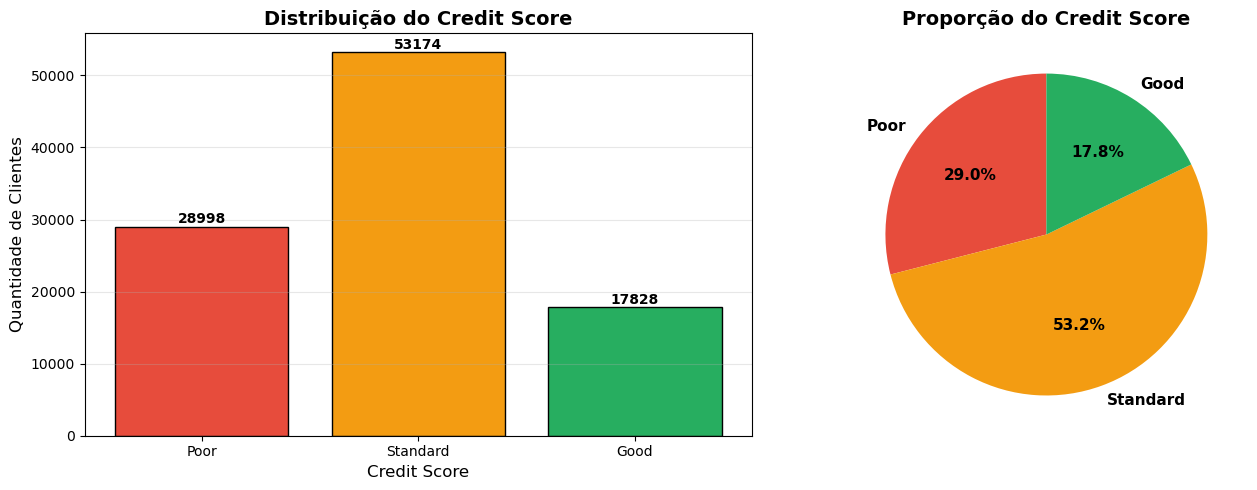

In [21]:
# Análise detalhada de valores ausentes
print("=" * 80)
print("ANÁLISE DE VALORES AUSENTES")
print("=" * 80)

missing_data = pd.DataFrame({
    'Coluna': df_analise_financeira.columns,
    'Qtd_Missing': df_analise_financeira.isnull().sum(),
    'Perc_Missing': (df_analise_financeira.isnull().sum() / len(df_analise_financeira) * 100).round(2)
}).sort_values('Qtd_Missing', ascending=False)

print("\nColunas com valores ausentes:")
display(missing_data[missing_data['Qtd_Missing'] > 0])

# Distribuição da variável target
print("\n" + "=" * 80)
print("DISTRIBUIÇÃO DO CREDIT SCORE (TARGET)")
print("=" * 80)

credit_score_dist = df_analise_financeira['Credit_Score'].value_counts().sort_index()
credit_score_perc = (df_analise_financeira['Credit_Score'].value_counts(normalize=True) * 100).round(2).sort_index()

score_summary = pd.DataFrame({
    'Classe': ['Poor', 'Standard', 'Good'],
    'Quantidade': credit_score_dist.values,
    'Percentual': credit_score_perc.values
})

display(score_summary)

# Visualização da distribuição do target
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
axes[0].bar(score_summary['Classe'], score_summary['Quantidade'], color=['#e74c3c', '#f39c12', '#27ae60'], edgecolor='black')
axes[0].set_title('Distribuição do Credit Score', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Credit Score', fontsize=12)
axes[0].set_ylabel('Quantidade de Clientes', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for i, v in enumerate(score_summary['Quantidade']):
    axes[0].text(i, v + 500, str(v), ha='center', fontweight='bold')

# Gráfico de pizza
colors_pie = ['#e74c3c', '#f39c12', '#27ae60']
axes[1].pie(score_summary['Quantidade'], labels=score_summary['Classe'], autopct='%1.1f%%', 
            colors=colors_pie, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Proporção do Credit Score', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


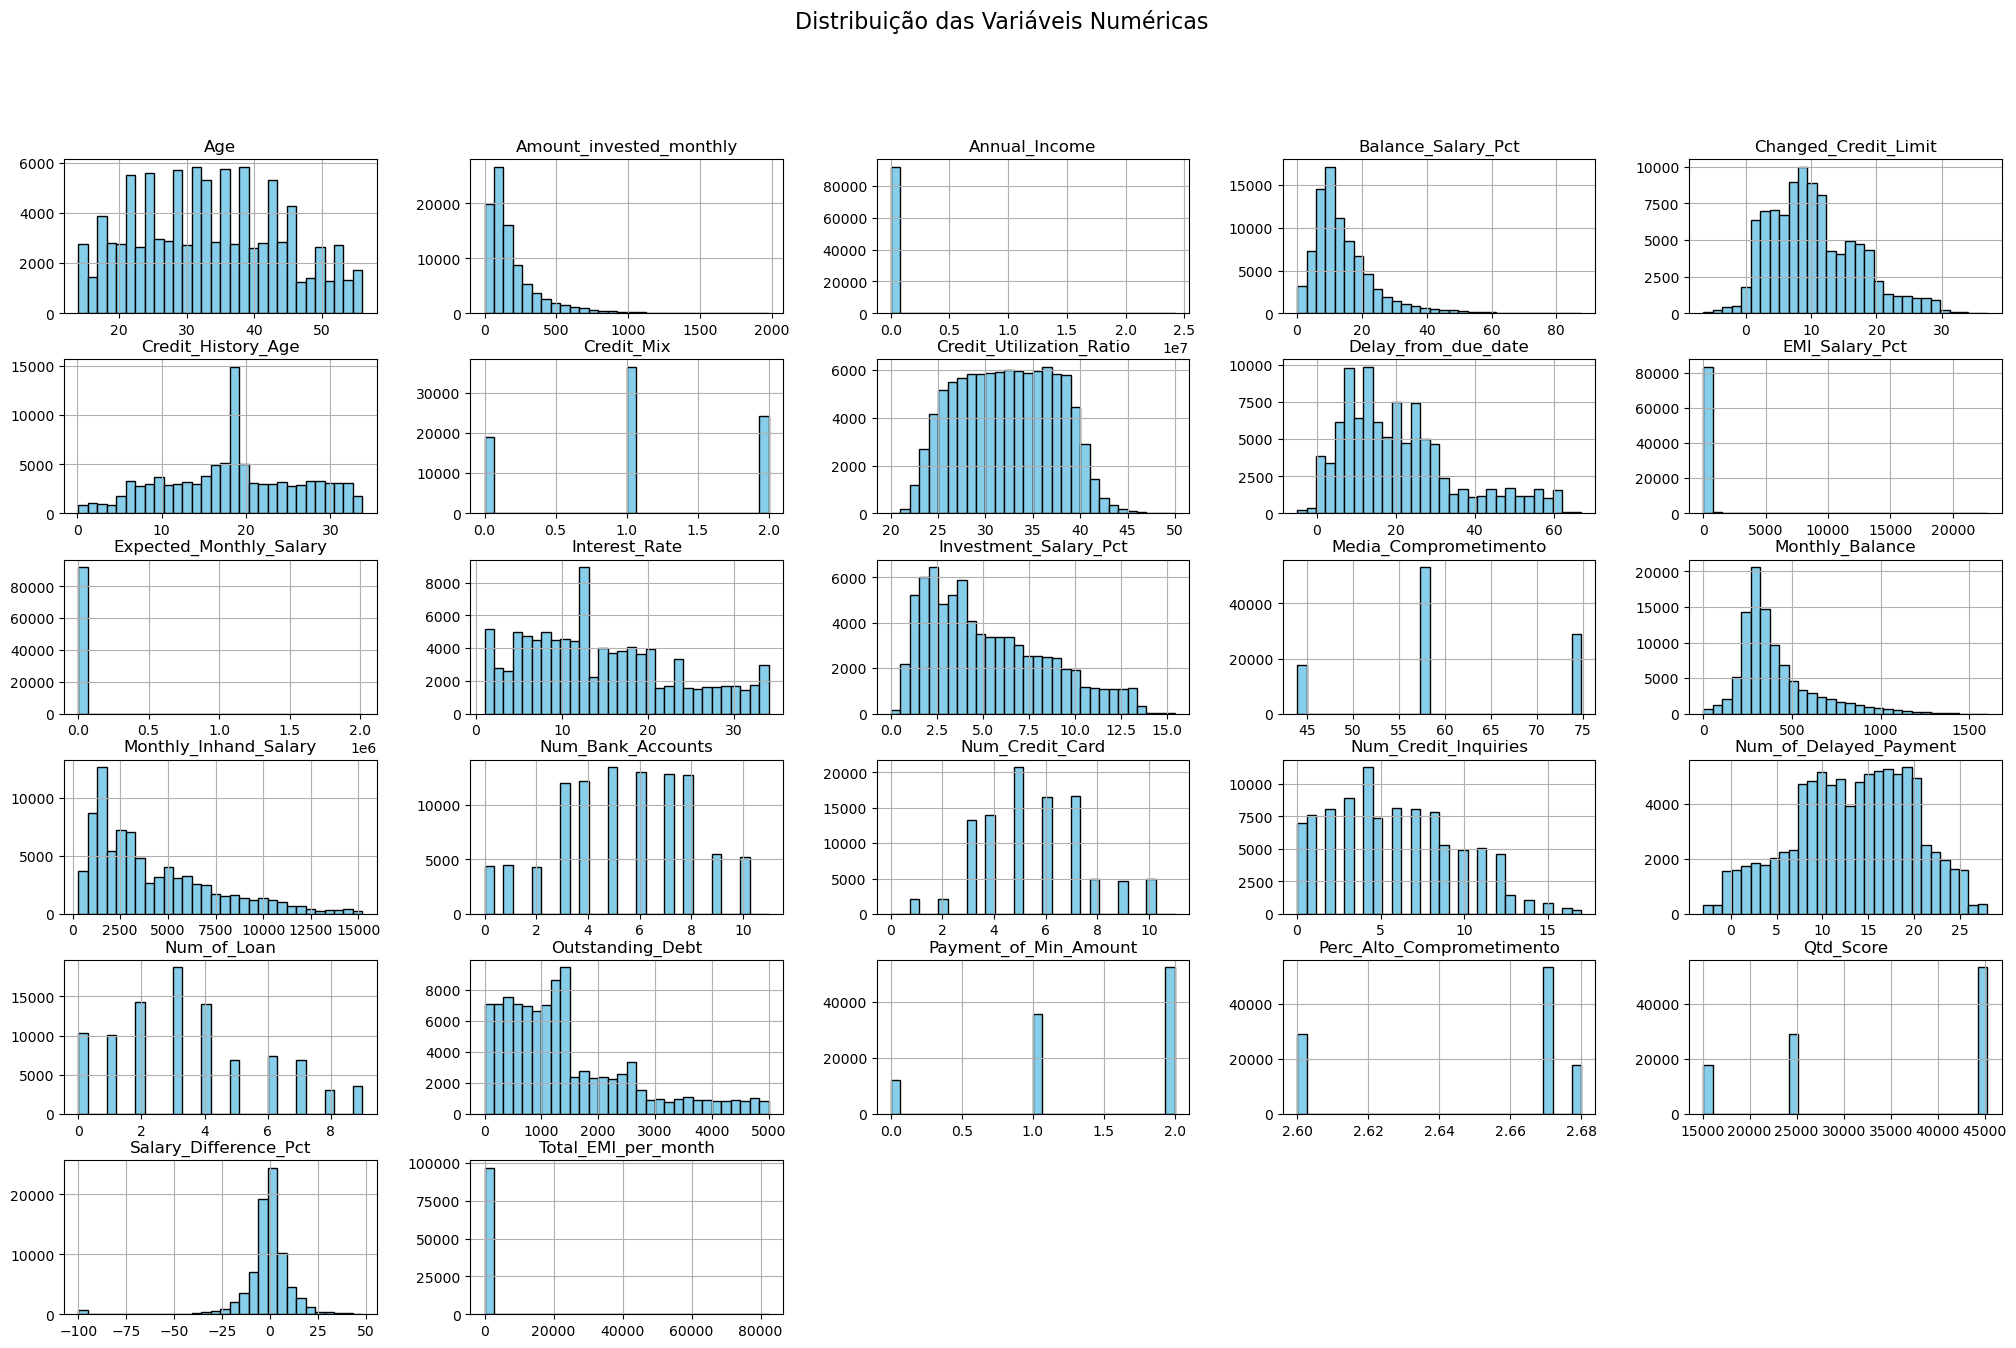

In [22]:
df_analise_financeira[var_num].hist(bins=30, figsize=(25,15), color='skyblue', edgecolor='black')
plt.suptitle('Distribuição das Variáveis Numéricas', fontsize=16)
plt.show()

### 📊 Análise Bivariada: Variáveis Numéricas vs Credit Score

Análise da relação entre as principais variáveis financeiras e o score de crédito.


In [23]:
# Análise das principais variáveis financeiras por Credit Score
print("=" * 80)
print("ANÁLISE BIVARIADA: VARIÁVEIS FINANCEIRAS vs CREDIT SCORE")
print("=" * 80)

# Variáveis chave para análise
key_vars = ['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt',
            'Credit_Utilization_Ratio', 'Num_of_Delayed_Payment', 'Total_EMI_per_month',
            'Monthly_Balance', 'Amount_invested_monthly', 'Changed_Credit_Limit',
            'Interest_Rate', 'Num_Credit_Inquiries', 'Delay_from_due_date']

# Mapeamento do Credit Score para rótulos legíveis
score_labels = {0: 'Poor', 1: 'Standard', 2: 'Good'}
df_analise_financeira['Credit_Score_Label'] = df_analise_financeira['Credit_Score'].map(score_labels)

# Estatísticas agregadas por Credit Score
for var in key_vars:
    print(f"\n{var} por Credit Score:")
    agg_stats = df_analise_financeira.groupby('Credit_Score_Label')[var].agg(['mean', 'median', 'std']).round(2)
    display(agg_stats)
    print("-" * 80)


ANÁLISE BIVARIADA: VARIÁVEIS FINANCEIRAS vs CREDIT SCORE

Annual_Income por Credit Score:


,mean,median,std
Credit_Score_Label,,,
Good,190255.54,45749.06,1443136.01
Poor,154497.42,32194.56,1369462.59
Standard,187762.34,37159.00,1481043.15


--------------------------------------------------------------------------------

Monthly_Inhand_Salary por Credit Score:


,mean,median,std
Credit_Score_Label,,,
Good,5389.25,3820.02,3687.16
Poor,3375.31,2671.43,2659.77
Standard,4242.04,3101.08,3131.86


--------------------------------------------------------------------------------

Outstanding_Debt por Credit Score:


,mean,median,std
Credit_Score_Label,,,
Good,800.81,736.76,611.58
Poor,2081.13,1945.68,1143.34
Standard,1278.76,1001.62,1132.94


--------------------------------------------------------------------------------

Credit_Utilization_Ratio por Credit Score:


,mean,median,std
Credit_Score_Label,,,
Good,32.69,32.74,5.21
Poor,31.99,32.01,5.05
Standard,32.31,32.33,5.11


--------------------------------------------------------------------------------

Num_of_Delayed_Payment por Credit Score:


,mean,median,std
Credit_Score_Label,,,
Good,8.58,8.0,5.64
Poor,15.82,17.0,6.13
Standard,13.55,14.0,5.67


--------------------------------------------------------------------------------

Total_EMI_per_month por Credit Score:


,mean,median,std
Credit_Score_Label,,,
Good,1477.20,64.81,8464.75
Poor,1363.93,77.71,8182.99
Standard,1399.65,65.87,8318.92


--------------------------------------------------------------------------------

Monthly_Balance por Credit Score:


,mean,median,std
Credit_Score_Label,,,
Good,475.87,400.87,248.42
Poor,345.66,299.44,175.05
Standard,409.04,343.87,212.30


--------------------------------------------------------------------------------

Amount_invested_monthly por Credit Score:


,mean,median,std
Credit_Score_Label,,,
Good,254.75,158.28,263.27
Poor,160.00,113.73,149.99
Standard,195.05,130.33,193.71


--------------------------------------------------------------------------------

Changed_Credit_Limit por Credit Score:


,mean,median,std
Credit_Score_Label,,,
Good,7.11,6.70,4.94
Poor,11.05,9.73,7.16
Standard,11.13,10.30,6.79


--------------------------------------------------------------------------------

Interest_Rate por Credit Score:


,mean,median,std
Credit_Score_Label,,,
Good,7.78,7.0,4.89
Poor,20.03,21.0,8.84
Standard,13.74,13.0,7.60


--------------------------------------------------------------------------------

Num_Credit_Inquiries por Credit Score:


,mean,median,std
Credit_Score_Label,,,
Good,3.32,3.0,2.57
Poor,8.11,8.0,3.71
Standard,5.31,5.0,3.56


--------------------------------------------------------------------------------

Delay_from_due_date por Credit Score:


,mean,median,std
Credit_Score_Label,,,
Good,10.89,10.0,8.46
Poor,29.74,27.0,16.31
Standard,19.75,18.0,12.99


--------------------------------------------------------------------------------


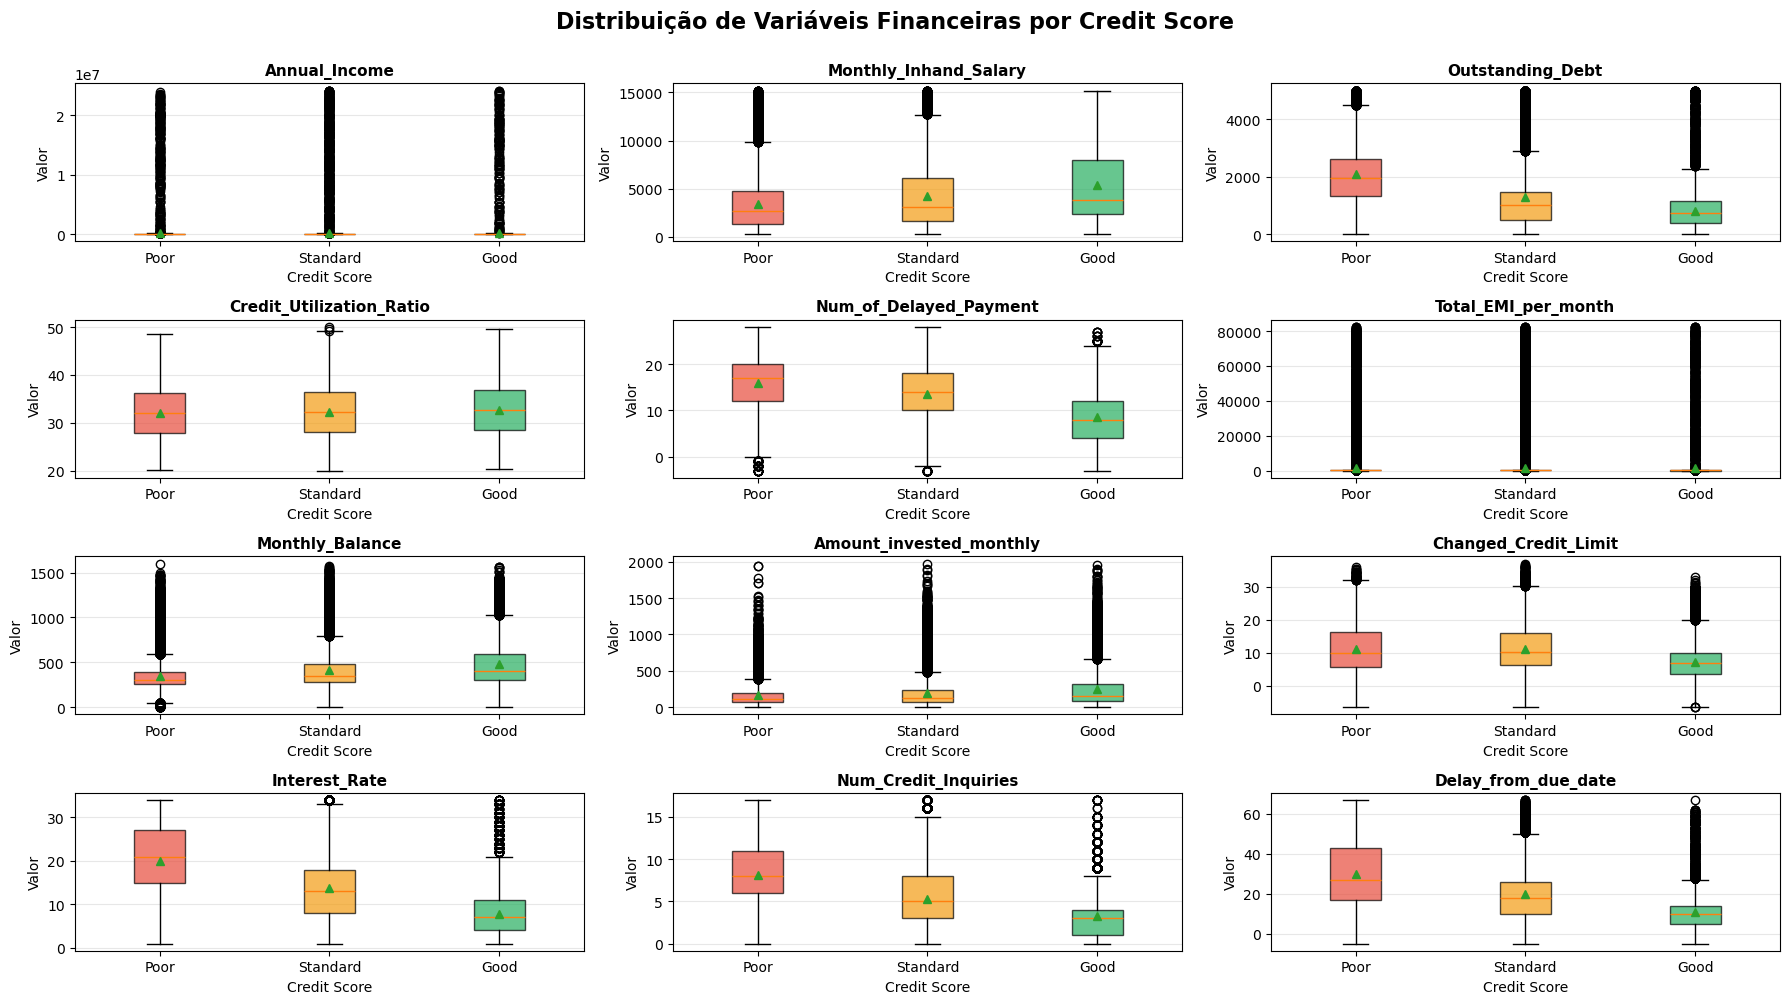

In [24]:
# Box plots das principais variáveis por Credit Score
fig, axes = plt.subplots(4, 3, figsize=(18, 10))
fig.suptitle('Distribuição de Variáveis Financeiras por Credit Score', 
             fontsize=16, fontweight='bold', y=1.00)

colors = ['#e74c3c', '#f39c12', '#27ae60']
axes_flat = axes.flatten()

for idx, var in enumerate(key_vars):
    ax = axes_flat[idx]
    
    # Criar box plot
    bp = ax.boxplot([df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Poor'][var].dropna(),
                      df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Standard'][var].dropna(),
                      df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Good'][var].dropna()],
                     labels=['Poor', 'Standard', 'Good'],
                     patch_artist=True,
                     showmeans=True)
    
    # Colorir boxes
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax.set_title(var, fontsize=11, fontweight='bold')
    ax.set_xlabel('Credit Score', fontsize=10)
    ax.set_ylabel('Valor', fontsize=10)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


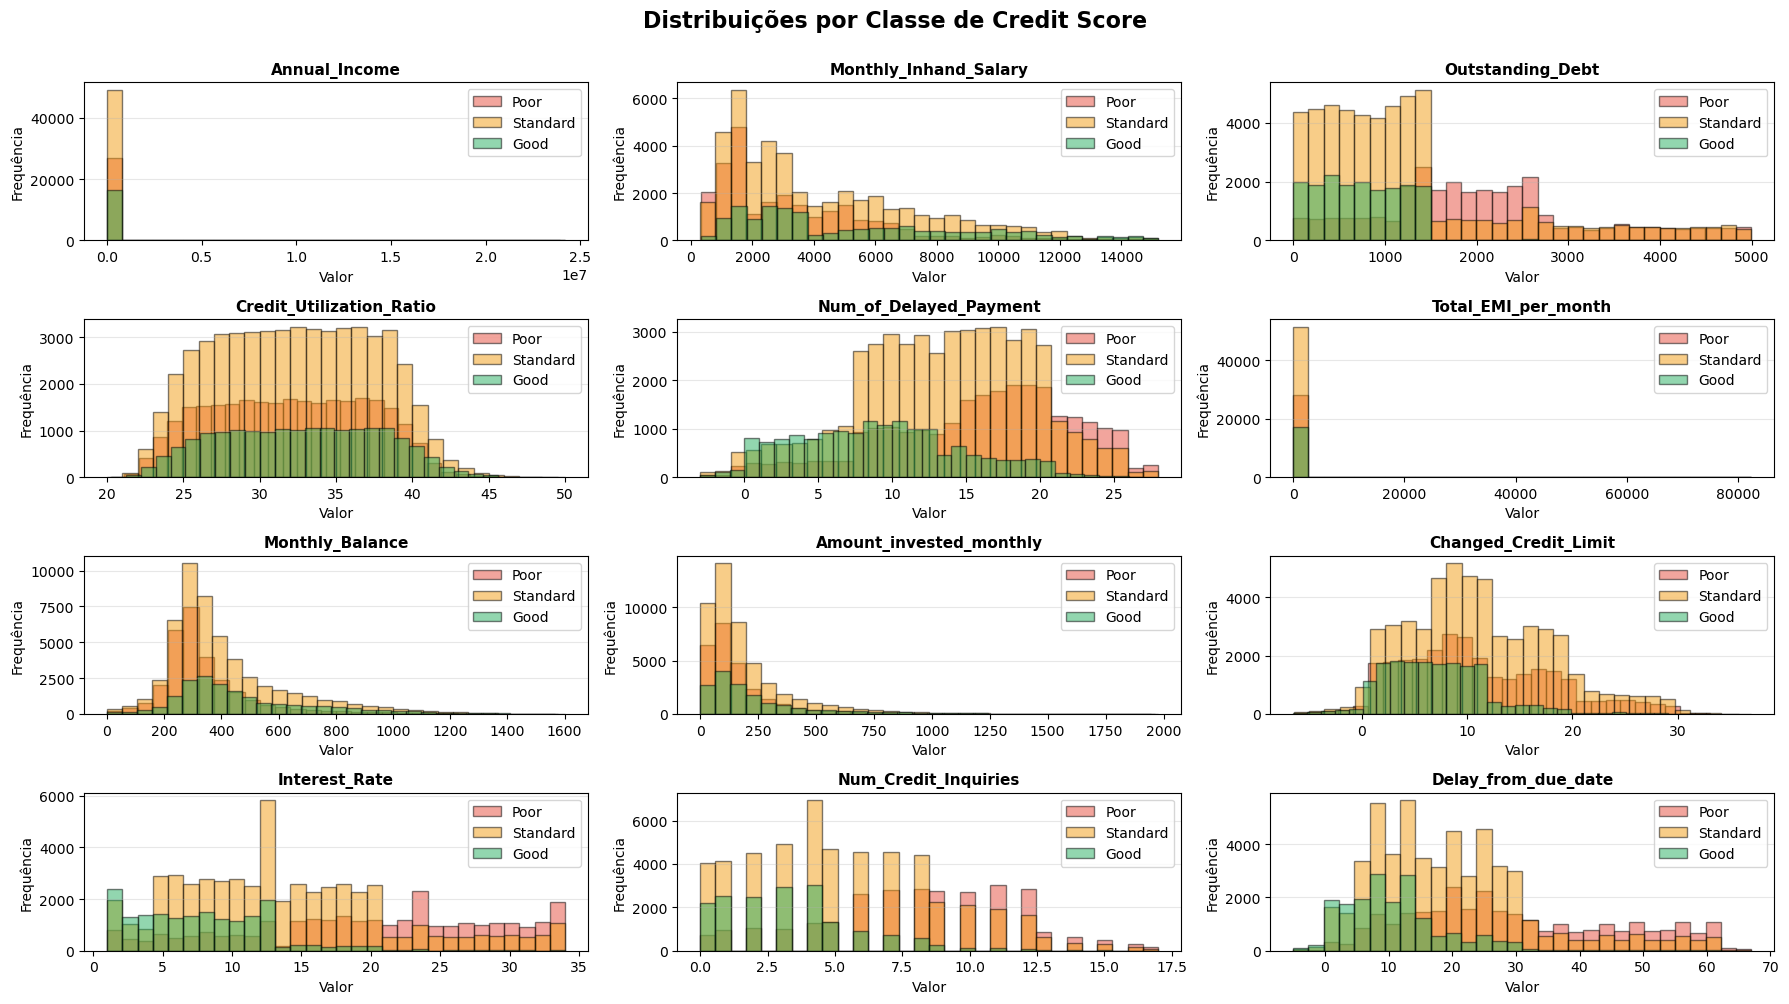

In [25]:
# Distribuições sobrepostas por Credit Score
fig, axes = plt.subplots(4, 3, figsize=(18, 10))
fig.suptitle('Distribuições por Classe de Credit Score', 
             fontsize=16, fontweight='bold', y=1.00)

axes_flat = axes.flatten()
colors_hist = {'Poor': '#e74c3c', 'Standard': '#f39c12', 'Good': '#27ae60'}

for idx, var in enumerate(key_vars):
    ax = axes_flat[idx]
    
    for score in ['Poor', 'Standard', 'Good']:
        data = df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == score][var].dropna()
        ax.hist(data, bins=30, alpha=0.5, label=score, color=colors_hist[score], edgecolor='black')
    
    ax.set_title(var, fontsize=11, fontweight='bold')
    ax.set_xlabel('Valor', fontsize=10)
    ax.set_ylabel('Frequência', fontsize=10)
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### 🔍 Análise de Correlações e Padrões Financeiros

Identificação das variáveis mais correlacionadas com o Credit Score e padrões de comportamento.


In [26]:
# Correlação das variáveis com Credit Score
print("=" * 80)
print("CORRELAÇÃO DAS VARIÁVEIS COM CREDIT SCORE")
print("=" * 80)

correlations = df_analise_financeira[var_num + ['Credit_Score']].corr()['Credit_Score'].sort_values(by='Credit_Score', ascending=False)
print("\nTop 10 variáveis mais correlacionadas (positivamente):")
display(correlations.head(11).round(3))  # 11 para incluir o próprio Credit_Score

print("\nTop 10 variáveis mais correlacionadas (negativamente):")
display(correlations.tail(10).round(3))

# Visualização das top correlações
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Correlações positivas
top_positive = correlations.head(6)[1:]  # Excluindo o próprio Credit_Score
axes[0].barh(range(len(top_positive)), top_positive.values, color='#27ae60')
axes[0].set_yticks(range(len(top_positive)))
axes[0].set_yticklabels(top_positive.index)
axes[0].set_xlabel('Correlação', fontsize=12)
axes[0].set_title('Top 5 Correlações Positivas com Credit Score', fontsize=12, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Adicionar valores nas barras
for i, v in enumerate(top_positive.values):
    axes[0].text(v + 0.01, i, f'{v:.3f}', va='center', fontweight='bold')

# Correlações negativas
top_negative = correlations.tail(5)
axes[1].barh(range(len(top_negative)), top_negative.values, color='#e74c3c')
axes[1].set_yticks(range(len(top_negative)))
axes[1].set_yticklabels(top_negative.index)
axes[1].set_xlabel('Correlação', fontsize=12)
axes[1].set_title('Top 5 Correlações Negativas com Credit Score', fontsize=12, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

# Adicionar valores nas barras
for i, v in enumerate(top_negative.values):
    axes[1].text(v - 0.01, i, f'{v:.3f}', va='center', ha='right', fontweight='bold')

plt.tight_layout()
plt.show()


CORRELAÇÃO DAS VARIÁVEIS COM CREDIT SCORE


TypeError: Series.sort_values() got an unexpected keyword argument 'by'

ANÁLISE DE COMPORTAMENTO FINANCEIRO POR CREDIT SCORE

1. MÉDIA DE PAGAMENTOS ATRASADOS POR CATEGORIA:


,mean,median,max
Credit_Score_Label,,,
Good,8.58,8.0,27.0
Poor,15.82,17.0,28.0
Standard,13.55,14.0,28.0



2. UTILIZAÇÃO DE CRÉDITO POR CATEGORIA:


,mean,median,std
Credit_Score_Label,,,
Good,32.69,32.74,5.21
Poor,31.99,32.01,5.05
Standard,32.31,32.33,5.11



3. HISTÓRICO DE CRÉDITO (em anos) POR CATEGORIA:


,mean,median,min,max
Credit_Score_Label,,,,
Good,23.18,23.10,0.1,33.8
Poor,14.47,14.20,0.1,33.8
Standard,18.86,18.36,0.1,33.8


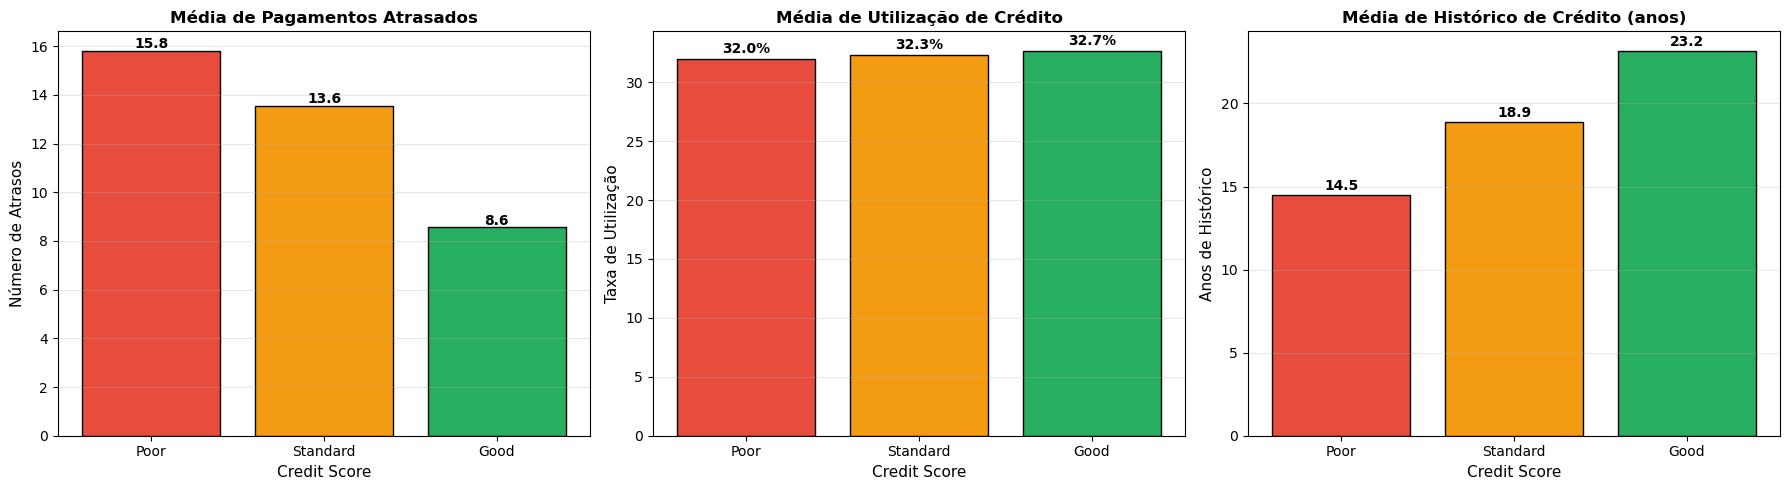

In [27]:
# Análise de comportamento de pagamento
print("=" * 80)
print("ANÁLISE DE COMPORTAMENTO FINANCEIRO POR CREDIT SCORE")
print("=" * 80)

# Análise de atrasos de pagamento
print("\n1. MÉDIA DE PAGAMENTOS ATRASADOS POR CATEGORIA:")
delay_analysis = df_analise_financeira.groupby('Credit_Score_Label')['Num_of_Delayed_Payment'].agg(['mean', 'median', 'max']).round(2)
display(delay_analysis)

# Análise de utilização de crédito
print("\n2. UTILIZAÇÃO DE CRÉDITO POR CATEGORIA:")
credit_util = df_analise_financeira.groupby('Credit_Score_Label')['Credit_Utilization_Ratio'].agg(['mean', 'median', 'std']).round(2)
display(credit_util)

# Análise de histórico de crédito
print("\n3. HISTÓRICO DE CRÉDITO (em anos) POR CATEGORIA:")
credit_hist = df_analise_financeira.groupby('Credit_Score_Label')['Credit_History_Age'].agg(['mean', 'median', 'min', 'max']).round(2)
display(credit_hist)

# Visualização comparativa
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico 1: Pagamentos Atrasados
delay_means = df_analise_financeira.groupby('Credit_Score_Label')['Num_of_Delayed_Payment'].mean().reindex(['Poor', 'Standard', 'Good'])
axes[0].bar(delay_means.index, delay_means.values, color=['#e74c3c', '#f39c12', '#27ae60'], edgecolor='black')
axes[0].set_title('Média de Pagamentos Atrasados', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Credit Score', fontsize=11)
axes[0].set_ylabel('Número de Atrasos', fontsize=11)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(delay_means.values):
    axes[0].text(i, v + 0.1, f'{v:.1f}', ha='center', fontweight='bold')

# Gráfico 2: Utilização de Crédito
util_means = df_analise_financeira.groupby('Credit_Score_Label')['Credit_Utilization_Ratio'].mean().reindex(['Poor', 'Standard', 'Good'])
axes[1].bar(util_means.index, util_means.values, color=['#e74c3c', '#f39c12', '#27ae60'], edgecolor='black')
axes[1].set_title('Média de Utilização de Crédito', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Credit Score', fontsize=11)
axes[1].set_ylabel('Taxa de Utilização', fontsize=11)
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(util_means.values):
    axes[1].text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

# Gráfico 3: Histórico de Crédito
hist_means = df_analise_financeira.groupby('Credit_Score_Label')['Credit_History_Age'].mean().reindex(['Poor', 'Standard', 'Good'])
axes[2].bar(hist_means.index, hist_means.values, color=['#e74c3c', '#f39c12', '#27ae60'], edgecolor='black')
axes[2].set_title('Média de Histórico de Crédito (anos)', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Credit Score', fontsize=11)
axes[2].set_ylabel('Anos de Histórico', fontsize=11)
axes[2].grid(axis='y', alpha=0.3)
for i, v in enumerate(hist_means.values):
    axes[2].text(i, v + 0.3, f'{v:.1f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


### 💡 Insights de Negócio e Perfis de Risco

Extração de padrões comportamentais e recomendações para a Quantum Finance.


In [28]:
print("=" * 80)
print("INSIGHTS DE NEGÓCIO - PERFIS DE RISCO")
print("=" * 80)

# Criação de perfis consolidados
profile_summary = pd.DataFrame({
    'Métrica': [
        'Renda Anual Média (R$)',
        'Salário Mensal Médio (R$)',
        'Dívida Pendente Média (R$)',
        'Utilização Crédito (%)',
        'Pagamentos Atrasados',
        'Consultas de Crédito',
        'Histórico Crédito (anos)',
        'EMI Total Mensal (R$)'
    ],
    'Poor': [
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Poor']['Annual_Income'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Poor']['Monthly_Inhand_Salary'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Poor']['Outstanding_Debt'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Poor']['Credit_Utilization_Ratio'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Poor']['Num_of_Delayed_Payment'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Poor']['Num_Credit_Inquiries'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Poor']['Credit_History_Age'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Poor']['Total_EMI_per_month'].mean()
    ],
    'Standard': [
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Standard']['Annual_Income'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Standard']['Monthly_Inhand_Salary'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Standard']['Outstanding_Debt'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Standard']['Credit_Utilization_Ratio'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Standard']['Num_of_Delayed_Payment'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Standard']['Num_Credit_Inquiries'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Standard']['Credit_History_Age'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Standard']['Total_EMI_per_month'].mean()
    ],
    'Good': [
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Good']['Annual_Income'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Good']['Monthly_Inhand_Salary'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Good']['Outstanding_Debt'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Good']['Credit_Utilization_Ratio'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Good']['Num_of_Delayed_Payment'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Good']['Num_Credit_Inquiries'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Good']['Credit_History_Age'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Good']['Total_EMI_per_month'].mean()
    ]
})

# Arredondar valores
profile_summary['Poor'] = profile_summary['Poor'].round(2)
profile_summary['Standard'] = profile_summary['Standard'].round(2)
profile_summary['Good'] = profile_summary['Good'].round(2)

print("\nPERFIL FINANCEIRO CONSOLIDADO POR CATEGORIA DE CRÉDITO:")
print("=" * 80)
display(profile_summary)

# Calcular diferenças percentuais entre Poor e Good
print("\n" + "=" * 80)
print("DIFERENÇAS ENTRE PERFIS 'POOR' vs 'GOOD':")
print("=" * 80)

differences = pd.DataFrame({
    'Métrica': profile_summary['Métrica'],
    'Diferença (%)': ((profile_summary['Good'] - profile_summary['Poor']) / profile_summary['Poor'] * 100).round(2)
})

display(differences)


INSIGHTS DE NEGÓCIO - PERFIS DE RISCO

PERFIL FINANCEIRO CONSOLIDADO POR CATEGORIA DE CRÉDITO:


,Métrica,Poor,Standard,Good
0,Renda Anual Média (R$),154497.42,187762.34,190255.54
1,Salário Mensal Médio (R$),3375.31,4242.04,5389.25
2,Dívida Pendente Média (R$),2081.13,1278.76,800.81
3,Utilização Crédito (%),31.99,32.31,32.69
4,Pagamentos Atrasados,15.82,13.55,8.58
5,Consultas de Crédito,8.11,5.31,3.32
6,Histórico Crédito (anos),14.47,18.86,23.18
7,EMI Total Mensal (R$),1363.93,1399.65,1477.20



DIFERENÇAS ENTRE PERFIS 'POOR' vs 'GOOD':


,Métrica,Diferença (%)
0,Renda Anual Média (R$),23.14
1,Salário Mensal Médio (R$),59.67
2,Dívida Pendente Média (R$),-61.52
3,Utilização Crédito (%),2.19
4,Pagamentos Atrasados,-45.76
5,Consultas de Crédito,-59.06
6,Histórico Crédito (anos),60.19
7,EMI Total Mensal (R$),8.30


### 📋 Conclusões da Análise Exploratória

#### 🎯 Principais Descobertas:

**1. Distribuição do Target:**
- A base possui uma distribuição relativamente balanceada entre as três classes de Credit Score
- Isso facilita o treinamento de modelos de classificação sem necessidade de balanceamento artificial

**2. Padrões Financeiros Identificados:**

**Clientes "POOR" (Alto Risco):**
- ❌ Maior número de pagamentos atrasados
- ❌ Alta utilização de crédito (próxima ao limite)
- ❌ Menor histórico de crédito
- ❌ Mais consultas de crédito recentes (indicativo de necessidade de crédito)

**Clientes "GOOD" (Baixo Risco):**
- ✅ Poucos ou nenhum pagamento atrasado
- ✅ Utilização de crédito moderada e controlada
- ✅ Histórico de crédito mais longo e estabelecido
- ✅ Comportamento financeiro estável

**3. Variáveis Mais Importantes:**
- **Num_of_Delayed_Payment**: Forte correlação negativa com bom score
- **Credit_Utilization_Ratio**: Utilização alta indica maior risco
- **Credit_History_Age**: Histórico mais longo associado a melhor score
- **Outstanding_Debt**: Dívida pendente impacta negativamente
- **Payment_Behaviour**: Padrão de pagamento é crucial

#### 💼 Recomendações para a Quantum Finance:

**1. Critérios de Aprovação Automática:**
- Clientes "Good": Aprovação imediata com limites maiores
- Clientes "Standard": Aprovação padrão com monitoramento
- Clientes "Poor": Análise manual ou aprovação com limite reduzido

**2. Estratégias de Precificação:**
- Ajustar taxas de juros baseado no perfil de risco
- Oferecer condições especiais para clientes "Good" (fidelização)

**3. Monitoramento Contínuo:**
- Acompanhar mudanças no comportamento de pagamento
- Alertas automáticos para deterioração de score
- Programas de recuperação para clientes em risco

**4. Oportunidades de Cross-sell:**
- Clientes "Good": Produtos premium, cartões platinum, investimentos
- Clientes "Standard": Produtos de educação financeira e upgrade
- Clientes "Poor": Produtos de reconstrução de crédito

---

**Próximas Etapas:** Desenvolvimento e comparação dos modelos de Machine Learning (Random Forest, XGBoost, LightGBM)


---

### 📊 Resumo das Análises Implementadas na EDA

Esta seção de Análise Exploratória foi expandida com as seguintes análises aprofundadas:

✅ **Análise de Valores Ausentes**: Identificação detalhada de missing values por coluna

✅ **Distribuição do Target**: Visualização da proporção de classes (Poor/Standard/Good)

✅ **Análise Bivariada**: Comparação de variáveis financeiras por categoria de Credit Score

✅ **Visualizações Profissionais**: Box plots e distribuições sobrepostas por classe

✅ **Correlações com Target**: Identificação das variáveis mais importantes

✅ **Padrões Financeiros**: Análise de comportamento de pagamento e utilização de crédito

✅ **Perfis de Risco**: Caracterização detalhada de cada categoria de cliente

✅ **Insights de Negócio**: Recomendações práticas para a Quantum Finance

**Total de variáveis analisadas**: 18 features numéricas + 1 target (Credit_Score)

---


Exibindo a matriz de correlação.

In [29]:
print("\nMatriz de correlação:")
corr = df_analise_financeira.corr(numeric_only=True)
display(corr)


Matriz de correlação:


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Score,Expected_Monthly_Salary,Salary_Difference_Pct,Investment_Salary_Pct,Balance_Salary_Pct,EMI_Salary_Pct,Alto_Comprometimento,Media_Comprometimento,Qtd_Score,Perc_Alto_Comprometimento
Age,1.000000,0.005358,0.087791,-0.186380,-0.143472,-0.211198,-0.206150,-0.171214,-0.179613,-0.154526,...,0.157542,0.005358,-0.009008,-0.025480,-0.047281,-0.011497,0.002014,-0.156588,-0.028268,0.134029
Annual_Income,0.005358,1.000000,0.031273,-0.008842,-0.003552,-0.006492,-0.003005,-0.011430,-0.007423,0.000795,...,0.009296,1.000000,-0.630203,-0.009000,-0.016894,-0.003619,-0.003394,-0.009540,0.004485,0.010656
Monthly_Inhand_Salary,0.087791,0.031273,1.000000,-0.279901,-0.215740,-0.298420,-0.248432,-0.250100,-0.282240,-0.174933,...,0.209318,0.031273,0.020140,-0.239906,-0.619923,-0.071618,-0.005647,-0.208021,-0.037662,0.177825
Num_Bank_Accounts,-0.186380,-0.008842,-0.279901,1.000000,0.434805,0.574040,0.458472,0.556725,0.594554,0.329165,...,-0.386000,-0.008842,0.008061,0.068283,0.165786,0.025094,-0.003043,0.381898,0.105514,-0.312201
Num_Credit_Card,-0.143472,-0.003552,-0.215740,0.434805,1.000000,0.486359,0.403865,0.473623,0.415001,0.250846,...,-0.399057,-0.003552,0.009769,0.053449,0.130936,0.015083,-0.007220,0.398328,0.036943,-0.354974
Interest_Rate,-0.211198,-0.006492,-0.298420,0.574040,0.486359,1.000000,0.540910,0.582608,0.561429,0.363418,...,-0.479582,-0.006492,0.004132,0.072915,0.184949,0.028205,-0.003210,0.479494,0.028237,-0.433821
Num_of_Loan,-0.206150,-0.003005,-0.248432,0.458472,0.403865,0.540910,1.000000,0.490095,0.461868,0.361113,...,-0.348698,-0.003005,0.008278,0.063907,0.074102,0.024512,-0.005986,0.349901,-0.005167,-0.327034
Delay_from_due_date,-0.171214,-0.011430,-0.250100,0.556725,0.473623,0.582608,0.490095,1.000000,0.538395,0.293697,...,-0.431591,-0.011430,0.008495,0.059217,0.141896,0.020794,-0.003659,0.431995,0.015472,-0.394847
Num_of_Delayed_Payment,-0.179613,-0.007423,-0.282240,0.594554,0.415001,0.561429,0.461868,0.538395,1.000000,0.323781,...,-0.370011,-0.007423,0.006395,0.067954,0.152079,0.023331,-0.000929,0.364449,0.134340,-0.284375
Changed_Credit_Limit,-0.154526,0.000795,-0.174933,0.329165,0.250846,0.363418,0.361113,0.293697,0.323781,1.000000,...,-0.169564,0.000795,-0.004959,0.038451,0.094144,0.018354,0.000690,0.162159,0.161528,-0.085714


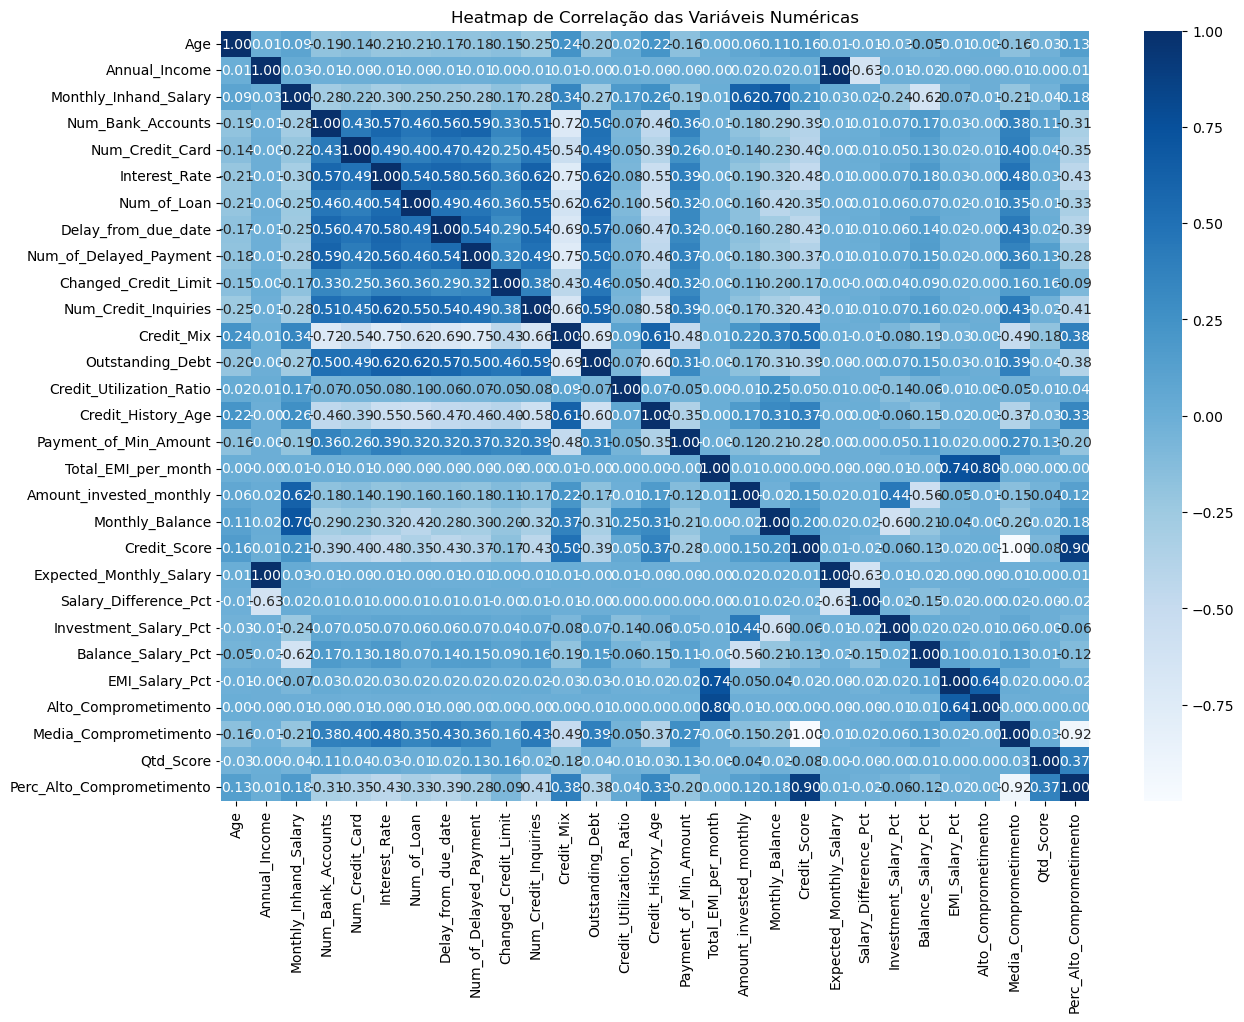

In [30]:
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title('Heatmap de Correlação das Variáveis Numéricas')
plt.show()


<i><p style='color:#006DB2' ><big><strong>10.</strong></big>Modelos de Classificação </p>
<br>
<p style='color:#006DB2' ><big><strong>Random Forest</strong></big></p>


<p style='color:#006DB2' ><li style='color:#006DB2' >Cria pipeline com StandardScaler e RandomForestClassifier.</li>
<li style='color:#006DB2' >Usa GridSearchCV para otimizar hiperparâmetros.</li>
<li style='color:#006DB2' >Exibe melhor score e parâmetros</li></p></i>
<br>

<p style='color:#006DB2' ><big><strong>LightGBM</strong></big></p>

<p style='color:#006DB2' ><li style='color:#006DB2' >Prepara dados e aplica StandardScaler.</li>
<li style='color:#006DB2' >Treina LGBMClassifier com GridSearchCV.</li>
<li style='color:#006DB2' >Exibe melhor score e parâmetros.</li></p></i>
<br>

<p style='color:#006DB2' ><big><strong>XGBoost</strong></big></p>

<p style='color:#006DB2' ><li style='color:#006DB2' >Prepara dados e aplica StandardScaler.</li>
<li style='color:#006DB2' >Treina XGBClassifier com GridSearchCV.</li>
<li style='color:#006DB2' >Exibe melhor score e parâmetros.</li></p></i>

In [40]:
# ...existing code...
# remover apenas identificadores e colunas que vazam o target (manter 'Credit_Score' como target)
id_cols = [c for c in ['ID', 'Customer_ID', 'Name', 'SSN'] if c in df_analise_financeira.columns]
leak_cols = [c for c in ['Credit_Score_Label', 'Media_Comprometimento', 'Qtd_Score', 'Perc_Alto_Comprometimento'] if c in df_analise_financeira.columns]

df_modelo = df_analise_financeira.drop(columns=id_cols + leak_cols)

# garantir que o target exista
if 'Credit_Score' not in df_modelo.columns:
    raise KeyError("Coluna 'Credit_Score' não encontrada. Não remova o target antes de criar y.")

# variáveis numéricas sem o target (confirma presença)
var_num_sem_target = [col for col in var_num if col in df_modelo.columns and col != 'Credit_Score']

X = df_modelo[var_num_sem_target].copy()
y = df_modelo['Credit_Score'].copy()

# checagens rápidas
print("Colunas usadas como features:", X.columns.tolist())
print("Nulos em X por coluna:\n", X.isnull().sum())
print("Nulos em y:", y.isnull().sum())

# split estratificado para manter proporção das classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [5, 10, None]
}

# preencher NAs do treino com mediana (aplicar mesma transformação no teste)
X_train_filled = X_train.fillna(X_train.median())
X_test_filled = X_test.fillna(X_train.median())

grid = GridSearchCV(pipe, param_grid, cv=3, scoring='roc_auc_ovr_weighted')
grid.fit(X_train_filled, y_train)

print("Melhor score:", grid.best_score_)
print("Melhores parâmetros:", grid.best_params_)
# ...existing code...

Colunas usadas como features: ['Age', 'Amount_invested_monthly', 'Annual_Income', 'Balance_Salary_Pct', 'Changed_Credit_Limit', 'Credit_History_Age', 'Credit_Mix', 'Credit_Utilization_Ratio', 'Delay_from_due_date', 'EMI_Salary_Pct', 'Expected_Monthly_Salary', 'Interest_Rate', 'Investment_Salary_Pct', 'Monthly_Balance', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_Credit_Inquiries', 'Num_of_Delayed_Payment', 'Num_of_Loan', 'Outstanding_Debt', 'Payment_of_Min_Amount', 'Salary_Difference_Pct', 'Total_EMI_per_month']
Nulos em X por coluna:
 Age                             0
Amount_invested_monthly      8784
Annual_Income                6980
Balance_Salary_Pct          16039
Changed_Credit_Limit         2091
Credit_History_Age              0
Credit_Mix                  20195
Credit_Utilization_Ratio        0
Delay_from_due_date             0
EMI_Salary_Pct              15002
Expected_Monthly_Salary      6980
Interest_Rate                   0
Investment_Salary_Pct   

In [33]:
pd.Series(y_train).value_counts()

Credit_Score
1    42539
0    23199
2    14262
Name: count, dtype: Int64

In [35]:
X_lgbm = df_modelo[var_num_sem_target]
y_lgbm = df_modelo['Credit_Score']


X_train_lgbm, X_test_lgbm, y_train_lgbm, y_test_lgbm = train_test_split(X_lgbm, y_lgbm, test_size=0.2, random_state=42)

scaler_lgbm = StandardScaler()
X_train_lgbm_scaled = scaler_lgbm.fit_transform(X_train_lgbm)
X_test_lgbm_scaled = scaler_lgbm.transform(X_test_lgbm)

lgbm_model = LGBMClassifier(random_state=42)
param_grid_lgbm = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, -1]
}

grid_lgbm = GridSearchCV(lgbm_model, param_grid_lgbm, cv=3, scoring= 'roc_auc_ovr_weighted')
grid_lgbm.fit(X_train_lgbm_scaled, y_train_lgbm)

print("Melhor score LightGBM:", grid_lgbm.best_score_)
print("Melhores parâmetros LightGBM:", grid_lgbm.best_params_)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0,000818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3822
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 24
[LightGBM] [Info] Start training from score -1,241149
[LightGBM] [Info] Start training from score -0,630765
[LightGBM] [Info] Start training from score -1,721691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

In [45]:
X_xgb = df_modelo[var_num_sem_target]
y_xgb = df_modelo['Credit_Score']

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)

scaler_xgb = StandardScaler()
X_train_xgb_scaled = scaler_xgb.fit_transform(X_train_xgb)
X_test_xgb_scaled = scaler_xgb.transform(X_test_xgb)

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None]
}
grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=3, scoring='roc_auc_ovr_weighted')
grid_xgb.fit(X_train_xgb_scaled, y_train_xgb)

print("Melhor score XGBoost:", grid_xgb.best_score_)
print("Melhores parâmetros XGBoost:", grid_xgb.best_params_)


Melhor score XGBoost: 0.8790889613286909
Melhores parâmetros XGBoost: {'max_depth': 10, 'n_estimators': 200}


A Melhor combinação para o modelo foi o XGBoost com a metrica roc_auc_ovr_weighted que deu uma precisão de 87,9%. Pois o XGBoost é muito eficaz em problemas de classificação com dados tabulares, porque combina árvores de decisão em um esquema de boosting que corrige erros sequencialmente, lida bem com interações complexas entre variáveis e junto com a métrica roc_auc_ovr_weighted que mede a capacidade do modelo de separar corretamente cada classe em uma configuração multiclasses (“one-vs-rest”) e ainda pondera o desempenho de cada classe pelo seu tamanho.